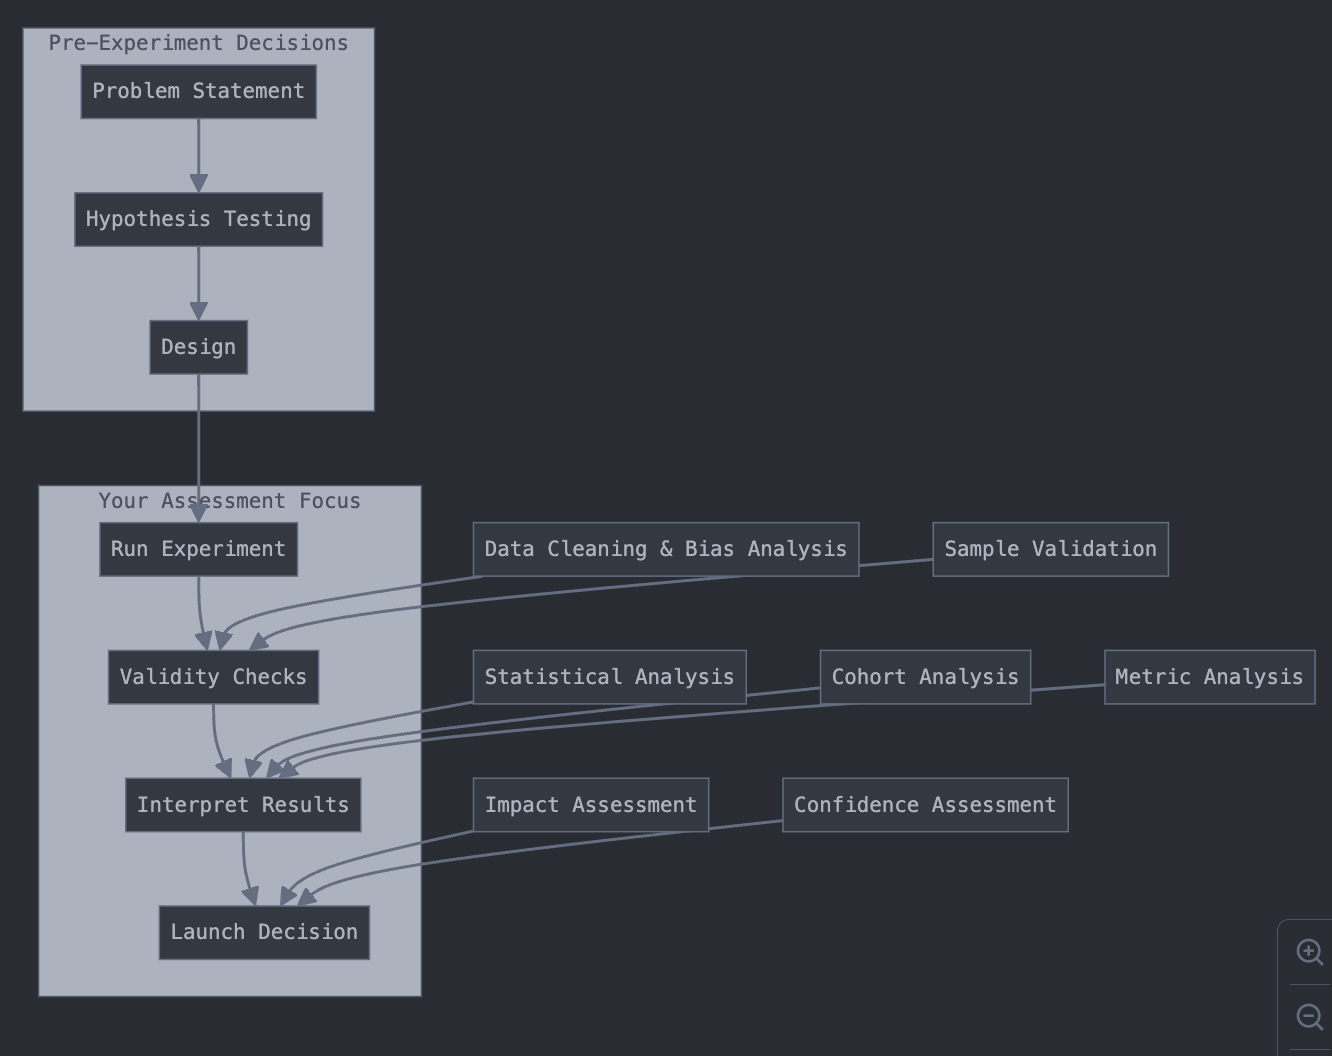

<a id="top"></a>
# Table of Contents
1. [Data Acquisition and Cleaning](#1-data-acquisition-and-cleaning)
   - [1.1 Download and Extract the Dataset](#11-download-and-extract-the-dataset)
   - [1.2 Inspect the Dataset for Structure and Content](#12-inspect-the-dataset-for-structure-and-content)
   - [1.3 Ensuring Data Types](#13-ensuring-data-types)
   - [1.4 Handle Missing Values](#14-handle-missing-values)
     - [1.4.1 Missing Values in 'device'](#141-missing-values-in-device)
     - [1.4.2 Missing Values in 'gender'](#142-missing-values-in-gender)
     - [1.4.3 Missing Values in 'value'](#143-missing-values-in-value)
   - [1.5 Remove or Correct Anomalies and Inconsistencies](#15-remove-or-correct-anomalies-and-inconsistencies)
     - [1.5.1 Check for Duplicates](#151-check-for-duplicates)
     - [1.5.2 Validate Categorical Columns](#152-validate-categorical-columns)
     - [1.5.3 Validate Numerical Columns](#153-validate-numerical-columns)
     - [1.5.4 Validate Temporal Column](#154-validate-temporal-column)
   - [1.6 Bias Analysis](#16-bias-analysis)
      - [1.6.1 Handling Overlapping Users (Independence)](#161-handling-overlapping-users-independence)
      - [1.6.2 Selection Bias](#162-selection-bias)
      - [1.6.3 Sampling Bias](#163-sampling-bias)
      - [1.6.4 Temporal Bias](#164-temporal-bias)
         - [1.6.4.1 Dataset Split: Pre-April vs. Post-April Segmentation](#1641-dataset-split-pre-april-vs-post-april-segmentation)
   - [1.7 Sampling and Validation](#17-sampling-and-validation)
      - [1.7.1 Stratified Resampling](#171-stratified-resampling)
      - [1.7.2 Sampling Validation Analysis](#172-sampling-validation-analysis)
2. [Calculate the Overall Conversion Rate, Value per Transaction, and Uplift](#2-calculate-the-overall-conversion-rate-value-per-transaction-and-uplift)
   - [2.1 Checking Assumptions for Z-Test](#21-checking-assumptions-for-z-test)
     - [2.1.1 Checking Binary Outcomes](#211-checking-binary-outcomes)
     - [2.1.2 Checking Sample Size Adequacy](#212-checking-sample-size-adequacy)
     - [2.1.3 Checking Independence of Observations](#213-checking-independence-of-observations)
   - [2.2 Conversion Rates](#22-conversion-rates)
     - [2.2.1 Calculation](#221-calculation)
     - [2.2.2 Conversion Rate Impact Analysis: Treatment vs. Control (Pre- and Post-April Comparison)](#222-conversion-rate-impact-analysis-treatment-vs-control-pre-and-post-april-comparison)
   - [2.3 Value per Transaction](#23-value-per-transaction)
     - [2.3.1 Calculation](#231-calculation)
     - [2.3.2 Value per Transaction (VPT) Analysis](#232-value-per-transaction-vpt-analysis)
     - [2.3.3 Overall Interpretation](#233-overall-interpretation)
3. [Calculate Conversion Rate, Value per Transaction, and Uplift per Cohort](#3-calculate-conversion-rate-value-per-transaction-and-uplift-per-cohort)
   - [3.1 User Distribution Across Cohorts](#31-user-distribution-across-cohorts)
   - [3.2 Cohort Conversion Analysis](#32-cohort-conversion-analysis)
     - [3.2.1 Early Period (Before April 17)](#321-early-period-before-april-17)
     - [3.2.2 Late Period (After April 17)](#322-late-period-after-april-17)
   - [3.3 Visualizations](#33-visualizations)
   - [3.4 Key Findings](#34-key-findings)
   - [3.5 Recommendations](#35-recommendations)
4. [Does The Company Provide a Positive or Negative Impact? (Assuming Conversion Rate as Primary Metric)](#4-does-the-company-provide-a-positive-or-negative-impact-assuming-conversion-rate-as-primary-metric)
   - [4.1 Overall Impact](#41-overall-impact)
   - [4.2 Impact by Period](#42-impact-by-period)
   - [4.3 Conclusion on Impact](#43-conclusion-on-impact)
5. [How Confident Are We in the Positive or Negative Impact?](#5-how-confident-are-we-in-the-positive-or-negative-impact)
   - [5.1 Statistical Confidence](#51-statistical-confidence)
   - [5.2 Limitations and Considerations](#52-limitations-and-considerations)
   - [5.3 Overall Confidence Level](#53-overall-confidence-level)
6. [Are There Any Other Metrics That Can Show a Positive or Negative Impact?](#6-are-there-any-other-metrics-that-can-show-a-positive-or-negative-impact)
   - [6.1 Segmented Conversion Rates](#61-segmented-conversion-rates)
     - [6.1.1 Age Group](#611-age-group)
     - [6.1.2 Device](#612-device)
     - [6.1.3 Gender](#613-gender)
     - [6.1.4 Vertical Name](#614-vertical-name)
   - [6.2 Revenue per User (RPU)](#62-revenue-per-user-rpu)
   - [6.3 Revenue per Session (RPS)](#63-revenue-per-session-rps)
   - [6.4 Average Order Value (AOV)](#64-average-order-value-aov)
   - [6.5 Summary of Additional Metrics](#65-summary-of-additional-metrics)
   - [6.6 Future Enhancements](#66-future-enhancements)

## Importing Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multitest import multipletests
from scipy.stats import ttest_ind, norm
import math
import zipfile

## 1. Data Acquisition and Cleaning 
[Back to Top](#top)

### 1.1: Download and extract the dataset.

In [4]:
# Path to the ZIP file
zip_path = "data/data.csv.zip"

# Read the specific CSV file from the ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    with zip_ref.open("data.csv") as csv_file:
        df = pd.read_csv(csv_file)

#Shape of input data
df.shape

(889091, 11)

### 1.2: Inspect the dataset for structure and content.

In [3]:
df.head()

,agegroup,bidprice_usd,campaigntimestamp,cohort,device,gender,group,sessionid,userhash,value,verticalname
0,26-30,0.0,2020-02-01 00:01:39,202002,mobile,f,treatment,37348334365,e7j+F6Pk3JiuQi+y3HI0xX7mzuSY5tTohpQM0FZIWPU=,NaN,Ticketing
1,36-40,0.0,2020-02-01 00:04:09,202002,Mobile,f,treatment,37348334755,217xmeBlQVPlC4vVXRdpSFG1uvbA2ET6BL/TaPAK7mo=,NaN,Media and Entertainment
2,31-35,0.0,2020-02-01 00:04:37,202002,Mobile,f,treatment,37349334794,YZm04BwARD+mj0R0MEYuKeAf4l1ZIRsge2LumlsnmTQ=,NaN,Media and Entertainment
3,26-30,0.0,2020-02-01 00:04:41,202002,Mobile,f,treatment,37348334834,TR25fI0N1lOqSu2hadffCZ+SNIA6iY9BHAnIXAVXuxM=,NaN,Ticketing
4,36-40,0.0,2020-02-01 00:04:54,202002,Other,f,treatment,37348334883,+ufGey+TPBU8o2SjY+AXrNvocVGXKjQ+H8pqq7jQ8y8=,NaN,Media and Entertainment


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889091 entries, 0 to 889090
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   agegroup           889091 non-null  object 
 1   bidprice_usd       889091 non-null  float64
 2   campaigntimestamp  889091 non-null  object 
 3   cohort             889091 non-null  int64  
 4   device             888969 non-null  object 
 5   gender             798461 non-null  object 
 6   group              889091 non-null  object 
 7   sessionid          889091 non-null  object 
 8   userhash           889091 non-null  object 
 9   value              15935 non-null   float64
 10  verticalname       889091 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 74.6+ MB


### 1.3: Handle missing values

In [5]:
df.isnull().sum()[lambda x:x > 0]

device       122
gender     90630
value     873156
dtype: int64

In [6]:
missing_percentages = (df.isnull().sum() / len(df)) * 100
missing_percentages

agegroup              0.000000
bidprice_usd          0.000000
campaigntimestamp     0.000000
cohort                0.000000
device                0.013722
gender               10.193557
group                 0.000000
sessionid             0.000000
userhash              0.000000
value                98.207720
verticalname          0.000000
dtype: float64

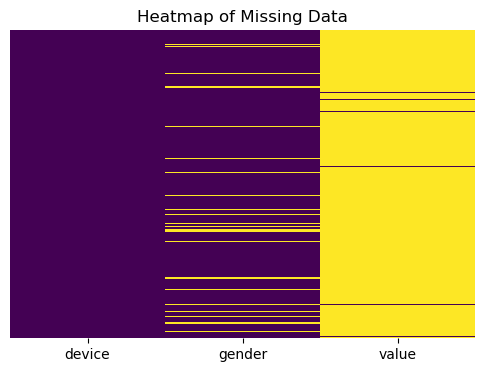

In [7]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['device','gender','value']].isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Data')
plt.show()

**Figure: Heatmap of Missing Data**

The heatmap above shows the distribution of missing values across the dataset. Missing data appears in specific columns, particularly `device`, `gender`, and `value`. The scattered pattern of missing values without significant clustering or alignment between columns suggests no potential relationship between missing values. This supports the assumption that the data might be **Missing Completely At Random (MCAR)**. This observation allows us to proceed with the main analysis, as these missing values are unlikely to introduce systematic bias.


#### 1.3.1 Handle Missing Values in 'device'

In [8]:
# Fill missing 'device' values with the mode
device_mode = df['device'].mode()[0]
df['device'].fillna(device_mode, inplace=True)

#### 1.3.2 Handle Missing Values in 'gender'

In [9]:
# Fill missing 'gender' values with 'Unknown'
df['gender'].fillna('Unknown', inplace=True)

#### 1.3.3 Handle Missing Values in 'value'

Since value is crucial for defining conversions, and missing values likely indicate no conversion, we should fill missing values with zero.

In [10]:
# Fill missing 'value' values with 0
df['value'].fillna(0, inplace=True)

#### Addressing Missing Data in the `value` Column
- **High Percentage of Missing Data**: Over 98% of the value data is missing, which presents challenges for statistical analysis relying directly on this column:
    - Low Sample Size: Only about 1.79% of the data is available for analysis.
    - Potential Bias: The missing data may not be missing at random, introducing bias into the analysis.

- **Assuming Missing value Means No Conversion**: 
    - To address this issue, I assumed that missing value entries correspond to users who did not make a conversion.
    - This assumption allows us to include these users in the analysis as non-converters.

- **Creation of the `converted` column**:
    - I created a new binary column called converted, which indicates whether a user made a conversion (i.e., had a transaction with a positive value)
    - This transformation simplifies the analysis by converting the data into binary outcomes.

Therefore, Defining `converted` users allows us to use z test (binary outcomes), instead of t test (originally continuous variables in `value` column)

In [ ]:
df['converted'] = df['value'] > 0



# Not all Converted users are converted , absolute value is not listed

NameError: name 'df' is not defined

### 1.4 Ensuring Data Types:

In [12]:
df.dtypes

agegroup              object
bidprice_usd         float64
campaigntimestamp     object
cohort                 int64
device                object
gender                object
group                 object
sessionid             object
userhash              object
value                float64
verticalname          object
converted               bool
dtype: object

In [13]:
# Convert 'campaigntimestamp' to datetime
df['campaigntimestamp'] = pd.to_datetime(df['campaigntimestamp'])

### 1.5 Remove or Correct Anomalies and Inconsistencies

#### 1.5.1 Check for Duplicates

In [14]:
# Checking duplicate rows
duplicate_rows = df[df.duplicated()]

# Count the number of duplicate rows
num_duplicates = duplicate_rows.shape[0]
print("Total number of duplicate rows:", num_duplicates)

Total number of duplicate rows: 36893


In [15]:
df.drop_duplicates(inplace=True)

# Checking again:
print("Number of duplicate rows after removal:", df.duplicated().sum())

Number of duplicate rows after removal: 0


**Decision**: I checked for and removed exact duplicate rows to prevent any potential inflation of user counts or transaction values. This was done using the drop_duplicates() function in pandas, which retains the first occurrence of each unique row and removes subsequent duplicates.

#### 1.5.2 Validate categorical columns

In [16]:
def summarize_categorical(column, df):
    summary = df[column].value_counts().to_frame(name='Count')
    summary['Percentage (%)'] = (df[column].value_counts(normalize=True) * 100)
    return summary

In [17]:
summarize_categorical('group', df)

,Count,Percentage (%)
group,,
treatment,724840,85.055351
control,127358,14.944649


In [18]:
summarize_categorical('cohort', df)

,Count,Percentage (%)
cohort,,
202006,290443,34.081634
202005,205418,24.104492
202004,155967,18.301733
202002,110911,13.014698
202003,89458,10.497326
203902,1,0.000117


In [19]:
# Dropping outlier cohort
df = df.loc[df['cohort'] != 203902].copy()
summarize_categorical('cohort', df)

,Count,Percentage (%)
cohort,,
202006,290443,34.081674
202005,205418,24.104520
202004,155967,18.301754
202002,110911,13.014714
202003,89458,10.497338


In [20]:
summarize_categorical('device', df)

,Count,Percentage (%)
device,,
Mobile,448267,52.601335
Desktop,162737,19.096171
mobile,110537,12.970827
Tablet,94830,11.127709
Other,35826,4.203958


In [21]:
# Device Column Standardization: Combining Mobile & mobile
df['device'] = df['device'].str.lower() 
summarize_categorical('device', df)

,Count,Percentage (%)
device,,
mobile,558804,65.572162
desktop,162737,19.096171
tablet,94830,11.127709
other,35826,4.203958


In [22]:
# As 65+ agegroup is less than 1% in distribution, Combining age groups '56-65' and '65+' into '56+'
df['agegroup'].replace({'56-65': '56+', '65+': '56+'}, inplace=True)
summarize_categorical('agegroup', df)

,Count,Percentage (%)
agegroup,,
18-25,353411,41.470575
31-35,134511,15.784026
36-40,120939,14.191437
26-30,96223,11.291169
41-45,79449,9.322844
46-55,41948,4.922336
56+,25716,3.017612


In [23]:
summarize_categorical('gender', df)

,Count,Percentage (%)
gender,,
f,616612,72.355570
m,148520,17.427895
Unknown,87065,10.216534


In [24]:
summarize_categorical('verticalname', df)

,Count,Percentage (%)
verticalname,,
Media and Entertainment,430175,50.478352
Food and Beverage,167738,19.683008
Retail,160438,18.826398
Ticketing,79917,9.377761
Travel,13435,1.576513
Finance,346,0.040601
Loyalty and Samples,146,0.017132
Sports and Fitness,2,0.000235


In [25]:
# Grouping smaller verticals into broader business categories
vertical_mapping = {
    'Loyalty and Samples': 'Retail',
    'Sports and Fitness': 'Media and Entertainment',
    'Finance': 'Other',
    'Travel': 'Other'
}

df['verticalname_gp'] = df['verticalname'].map(vertical_mapping).fillna(df['verticalname'])

summarize_categorical('verticalname_gp', df)

,Count,Percentage (%)
verticalname_gp,,
Media and Entertainment,430177,50.478587
Food and Beverage,167738,19.683008
Retail,160584,18.843530
Ticketing,79917,9.377761
Other,13781,1.617114


#### 1.5.3 Validate Numerical Columns

In [26]:
# Describe 'bidprice_usd' statistics
print(df['bidprice_usd'].describe())

# Check for negative or zero bid prices
invalid_bid_prices = df[df['bidprice_usd'] <= 0]
print("Number of invalid bid prices:", len(invalid_bid_prices))

count    852197.000000
mean          0.057932
std           0.254358
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.507550
Name: bidprice_usd, dtype: float64
Number of invalid bid prices: 788354


**Possible Reasons for Zero Bid Prices**

Control Group:

- Users in the control group might have bidprice_usd of zero because they did not see an advertisement.
- Verify if group == 'control' corresponds to bidprice_usd == 0.

No Bids Placed:

- Zero bid prices may indicate sessions where no bid was placed or no ad was served.

Data Recording:

- bidprice_usd may only be recorded when a bid is made, and zero otherwise.

In [27]:
# Cross-tabulation of 'group' and zero bid prices
zero_bid = df['bidprice_usd'] == 0
group_bid_counts = df.groupby(['group', zero_bid]).size().unstack()

print(group_bid_counts)

bidprice_usd    False     True 
group                          
control           NaN  127358.0
treatment     63843.0  660996.0


- All bid prices in the control group are zero. Users in the control group did not see an advertisement, so there was no bid price associated with their session.
- The treatment group has both zero and non-zero bid prices. Some sessions in the treatment group have zero bid prices, possibly indicating that no bid was placed or the bid price was recorded as zero. For non-zero, these sessions represent actual bids made during the treatment.

- While calculating VPT, direct comparison of VPT between both groups may not be meaningful due to the control group having no bid activity.

In [ ]:
# Validating sessionid
df['sessionid'].str.len().value_counts().sort_index()

sessionid
11    644742
31         1
32         1
33        70
34      1245
35     19979
36    186159
Name: count, dtype: int64

In [29]:
# Check for session ID uniqueness and validity
session_counts = df['sessionid'].value_counts()
duplicate_sessions = session_counts[session_counts > 1]
if not duplicate_sessions.empty:
    print(f"Found {len(duplicate_sessions)} duplicate session IDs")

Found 73934 duplicate session IDs


The presence of duplicate `sessionid`s is expected and valid, as per definition `sessionid` represents multiple events within the same session.

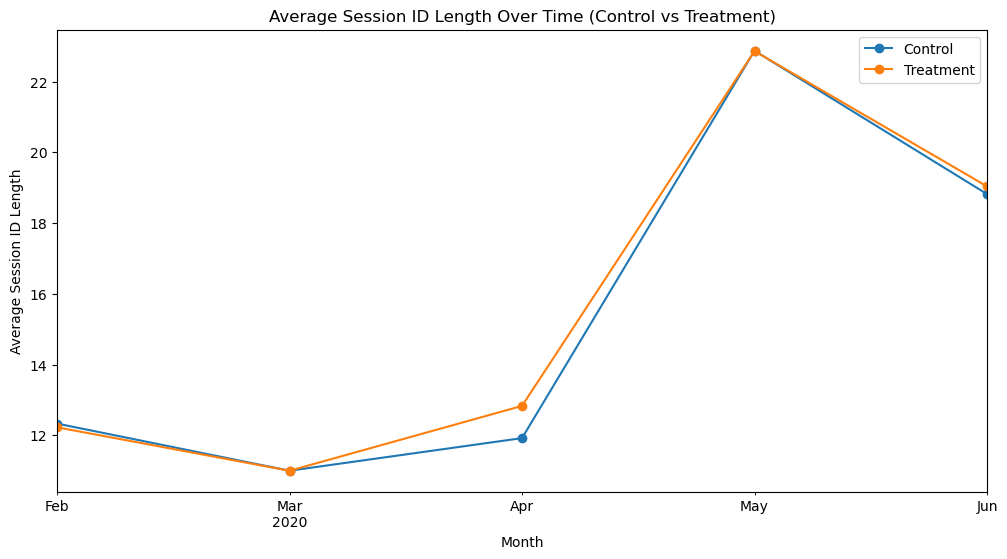

In [30]:

df['session_length'] = df['sessionid'].str.len()
# df['campaigntimestamp'] = pd.to_datetime(df['campaigntimestamp'])
df['month'] = df['campaigntimestamp'].dt.to_period('M')
session_length_over_time = df.groupby(['month', 'group'])['session_length'].mean().unstack()

plt.figure(figsize=(12, 6))
session_length_over_time['control'].plot(label='Control', marker='o')
session_length_over_time['treatment'].plot(label='Treatment', marker='o')

plt.title('Average Session ID Length Over Time (Control vs Treatment)')
plt.xlabel('Month')
plt.ylabel('Average Session ID Length')
plt.xticks(rotation=45)
plt.legend()
plt.show()

- The analysis of session ID length over time, segmented by control and treatment groups, reveals a consistent pattern of change across both groups. This consistency suggests that any observed shifts in session ID length are likely due to systemic or process-related factors rather than group-specific effects. Therefore, these changes should not introduce bias into further analysis, as they appear uniformly across the control and treatment groups.

In [31]:
# Check for user hash uniqueness and patterns
user_counts = df['userhash'].value_counts()
users_multiple_sessions = user_counts[user_counts > 1]
print(f"Users with multiple sessions: {len(users_multiple_sessions)}")

Users with multiple sessions: 145534


#### 1.5.4 Validate Temporal Column

In [32]:
df['campaigntimestamp'].dt.year.value_counts().sort_index().reset_index(name='Row Count')

,campaigntimestamp,Row Count
0,2020,852197


In [ ]:
# Dropping outlier row  
df = df.loc[df['campaigntimestamp'] != pd.Timestamp('2039-02-01 00:03:27')].copy()

In [34]:
# checking both groups timestamp boundaries to see timeframe anomalies
df.groupby('group')['campaigntimestamp'].agg(['min', 'max'])

,min,max
group,,
control,2020-02-01 00:00:03,2020-06-30 23:59:08
treatment,2020-02-01 00:00:09,2020-06-30 23:59:59


##### **Data Quality Summary**

1. Missing Values:
   - device: 0.01% (filled with mode)
   - gender: 10.19% (filled with 'Unknown')
   - value: 98.21% (filled with 0, indicating no conversion)

2. Data Transformations:
   - Standardized device names to lowercase
   - Grouped minor verticals into major categories
   - Converted campaign timestamps to datetime format
   
3. Data Removal:
   - Removed duplicate rows: 36,893 rows
   - Removed outlier cohort (203902): 1 row
   - Removed future timestamp: 1 row


---

### 1.6 Check for Bias Analysis

A/B testing validity relies heavily on controlling various forms of bias. We'll examine four key types of bias that could affect our results.

#### 1.6.1 Handling Overlapping Users (Independence)

Overlapping users between treatment and control groups can compromise the independence assumption crucial for statistical validity. 

When users appear in both groups:
- Their behaviors may be influenced by exposure to both versions: `carryover bias`
- It violates the fundamental A/B testing principle of independent sampling
- It can lead to contamination effects where the treatment effect spreads to the control group

In [35]:
# Separate treatment and control groups
treatment_df = df[df['group'] == 'treatment']
control_df = df[df['group'] == 'control']

In [36]:
# Check 
overlapping_users = set(treatment_df['userhash']).intersection(set(control_df['userhash']))
if len(overlapping_users) == 0:
    print("No overlapping users between treatment and control groups. Independence assumption is likely met.")
else:
    print(f"Found {len(overlapping_users)} overlapping users between groups. Independence assumption may be violated.")

Found 26426 overlapping users between groups. Independence assumption may be violated.


**Options**: There are two options to handle the violation of the independence assumption: 
- *Option A*: remove the overlapping users from both groups or 
- *Option B*: perform alternative statistical tests that account for dependence.

In [37]:
# Percentage of overlapping users = Total unique users/Number of overlapping users * 100
total_users = df['userhash'].nunique()

# Number of overlapping users
overlapping_users_count = len(overlapping_users)
overlapping_users_percentage = (overlapping_users_count / total_users) * 100

overlapping_user_df = df[df['userhash'].isin(overlapping_users)]

treatment_percentage_in_overlapping = (len(overlapping_user_df[overlapping_user_df['group'] == 'treatment']) / len(df)) * 100
control_percentage_in_overlapping = (len(overlapping_user_df[overlapping_user_df['group'] == 'control']) / len(df)) * 100

# User Summary
print("User Summary")
print("------------")
print(f"Total unique users: {total_users}")
print(f"Number of overlapping users: {overlapping_users_count}")
print(f"Percentage of overlapping users: {overlapping_users_percentage:.2f}%")

# Dataset Summary
print("\nDataset Summary")
print("---------------")
print(f"Total dataset size: {len(df)}")
print(f"Dataset size of overlapping users: {len(overlapping_user_df)}")
print(f"Dataset size percentage of overlapping users: {(len(overlapping_user_df) / len(df)) * 100:.2f}%")

# Group Distribution in Overlapping Users
print("\nGroup Distribution in Overlapping Users")
print("---------------------------------------")
print(f"Percentage of 'treatment' group: {treatment_percentage_in_overlapping:.2f}%")
print(f"Percentage of 'control' group: {control_percentage_in_overlapping:.2f}%") 

User Summary
------------
Total unique users: 671795
Number of overlapping users: 26426
Percentage of overlapping users: 3.93%

Dataset Summary
---------------
Total dataset size: 852197
Dataset size of overlapping users: 67488
Dataset size percentage of overlapping users: 7.92%

Group Distribution in Overlapping Users
---------------------------------------
Percentage of 'treatment' group: 4.52%
Percentage of 'control' group: 3.40%


**Decision**: Since overlapping users represent 3.93% of unique users and 7.92% of total records with balanced group distribution, removing them is a feasible approach that maintains statistical power while ensuring group independence.


In [38]:
# Remove overlapping users
overlapping_users = set(treatment_df['userhash']).intersection(set(control_df['userhash']))
treatment_df_clean = treatment_df[~treatment_df['userhash'].isin(overlapping_users)]
control_df_clean = control_df.copy() #[~control_df['userhash'].isin(overlapping_users)] # keeping overlapping in control to help mitigate bias in sampling

df_clean = pd.concat([treatment_df_clean, control_df_clean], ignore_index=True)

# Optional: Verify the resulting DataFrame
print(f"Original dataset size: {df.shape}")
print(f"Cleaned dataset size: {df_clean.shape}")

Original dataset size: (852197, 15)
Cleaned dataset size: (813646, 15)


**Analysis**: The data cleaning process removed 38,551 records (4.5% reduction from 852,197 to 813,646), with overlapping users retained in the control group to help mitigate sampling bias. This approach maintains sufficient sample size for robust statistical analysis while ensuring independence between treatment and control groups.

---

#### 1.6.2 Selection Bias

##### Sample Size Ratios in A/B Testing

Selection bias occurs when the distribution of characteristics differs systematically between treatment and control groups. This can lead to:
- Confounding variables affecting the results
- Reduced internal validity of the experiment
- Incorrect attribution of treatment effects

In [39]:
categorical_columns=['device', 'gender', 'agegroup', 'verticalname_gp']

In [40]:
def check_selection_bias(treatment_df, control_df, categorical_columns=['device', 'gender', 'agegroup', 'verticalname_gp']):
    """
    Check for selection bias between treatment and control groups.
    """
    results = []
    clean_df = pd.concat([treatment_df, control_df]).reset_index(drop=True)
    
    for column in categorical_columns:
        # Proportions
        prop_treat = treatment_df[column].value_counts(normalize=True)
        prop_control = control_df[column].value_counts(normalize=True)
        
        # Align categories
        all_categories = sorted(set(prop_treat.index) | set(prop_control.index))
        prop_treat = prop_treat.reindex(all_categories, fill_value=0)
        prop_control = prop_control.reindex(all_categories, fill_value=0)
        
        # Standardized difference
        std_diff = np.abs(prop_treat - prop_control) / \
                  np.sqrt((prop_treat * (1-prop_treat) + prop_control * (1-prop_control))/2)
        
        avg_std_diff = std_diff.mean()
        
        results.append({
            'Variable': column,
            'Std Diff': f"{avg_std_diff:.4f}",
            'Bias Detected': 'Yes' if avg_std_diff > 0.1 else 'No'
        })
    
    results_df = pd.DataFrame(results)
    print("-------------------------------------------------------------")
    print("\033[1;4mSelection Bias Analysis:\033[0m")
    print(results_df.to_string(index=False))
    print("-------------------------------------------------------------")
    
    return any(avg_std_diff > 0.1 for avg_std_diff in [float(r['Std Diff']) for r in results])

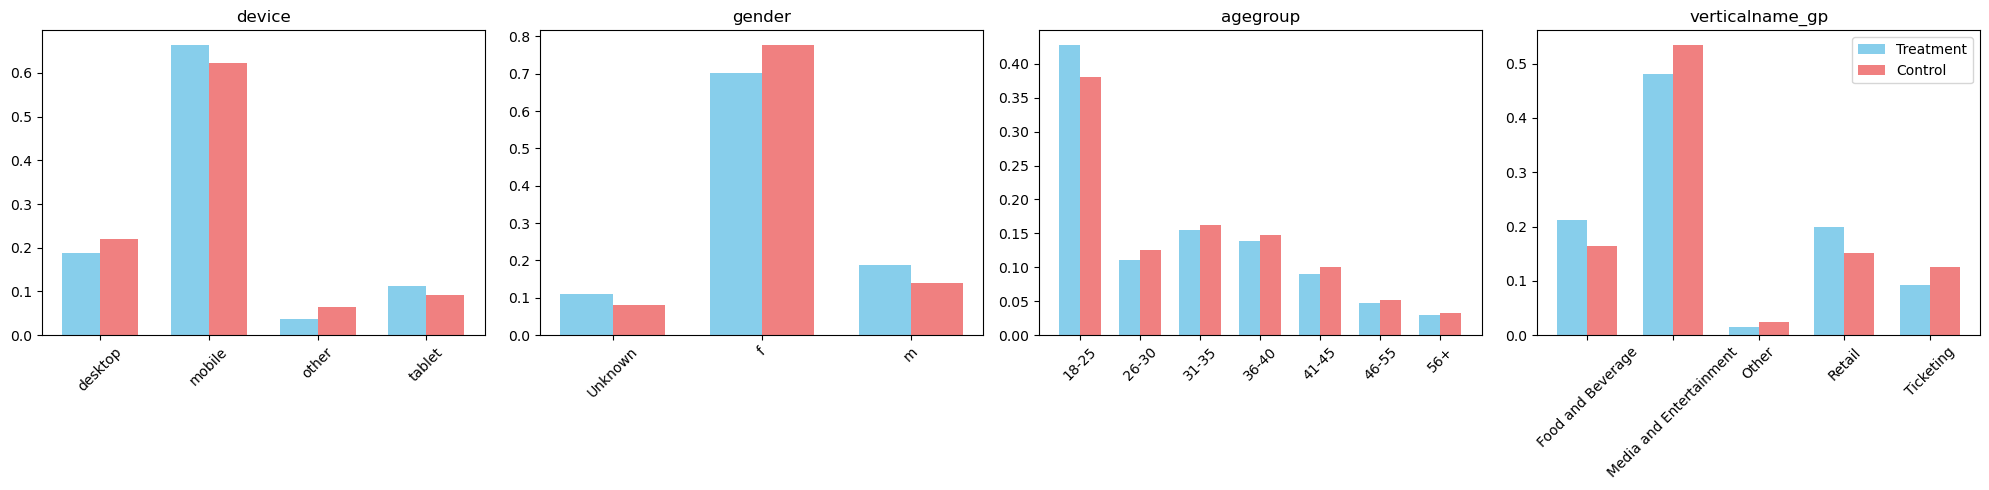

In [41]:
def plot_all_selection_bias_short(treatment_df, control_df, columns=categorical_columns):
    """
    Visualize selection bias between treatment and control groups for multiple categorical columns in a grid.
    """
    n_cols, n_rows = 4, math.ceil(len(columns) / 4)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        prop_treat = treatment_df[column].value_counts(normalize=True)
        prop_control = control_df[column].value_counts(normalize=True)
        all_categories = sorted(set(prop_treat.index) | set(prop_control.index))
        prop_treat, prop_control = prop_treat.reindex(all_categories, fill_value=0), prop_control.reindex(all_categories, fill_value=0)

        bar_width, index = 0.35, range(len(all_categories))
        axes[i].bar(index, prop_treat, bar_width, label='Treatment', color='skyblue')
        axes[i].bar([x + bar_width for x in index], prop_control, bar_width, label='Control', color='lightcoral')
        
        axes[i].set_title(f'{column}')
        axes[i].set_xticks([x + bar_width / 2 for x in index])
        axes[i].set_xticklabels(all_categories, rotation=45)

    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.legend(['Treatment', 'Control'])
    plt.show()

plot_all_selection_bias_short(treatment_df_clean, control_df_clean)

**Analysis**: Selection bias was detected in two key variables:
- `Gender` shows significant bias (std_diff = 0.1338), indicating substantial imbalance in gender distribution between treatment and control groups
- `Vertical name grouping` also exhibits bias (std_diff = 0.1058), suggesting systematic differences in business vertical representation

While `device` (std_diff = 0.0924) and `age group` (std_diff = 0.0369) show acceptable balance, the detected biases in gender and vertical categories suggest:
- Potential non-random assignment across these demographics
- Need for demographic controls in final analysis
- Possible requirement for stratified sampling or weighting in subsequent analyses to account for these imbalances

These biases, particularly in gender distribution, could impact the generalizability of our findings and should be considered when interpreting treatment effects.

-----

#### 1.6.3 Sampling Bias

Sampling bias occurs when certain groups in a population are more likely to be selected for the study than others, leading to a non-representative sample. In A/B testing:

**Sample Size Imbalance:**
- A treatment-to-control ratio significantly different from 1:1 can indicate sampling bias
- Industry standard typically accepts ratios between 1:2 and 2:1
- Current analysis shows a ratio of 5.39:1, indicating substantial sampling bias

**Impact on Analysis:**
- Overrepresentation in treatment group (84% of total sample)
- Reduced statistical power in the control group
- Potential systematic differences in user characteristics between groups

**Mitigation Strategies:**
- Consider resampling to achieve better balance
- Use weighted analysis techniques
- Account for imbalance in statistical significance calculations

-------------------------------------------------------------
Sample Size Bias Analysis:
Treatment group size: 686,288
Control group size: 127,358
Treatment/Control ratio: 5.39
Ratio 5.39 exceeds critical threshold of 5

CRITICAL: Severe sample size bias detected
-------------------------------------------------------------


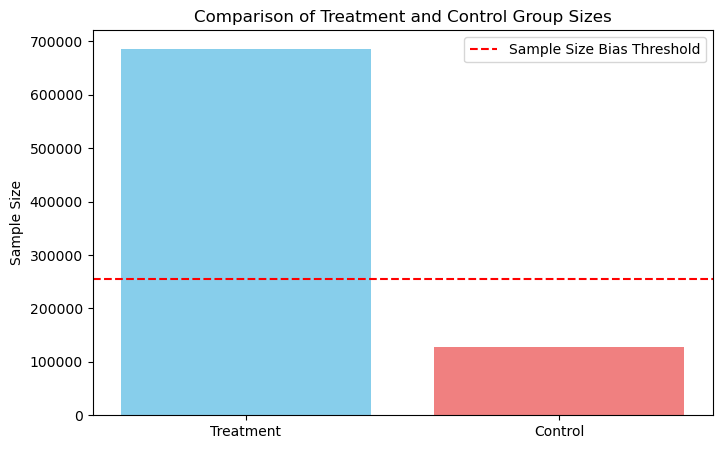

In [42]:
def check_sample_size_bias(df_t, df_c, warning_threshold=2, critical_threshold=5):
    """
    Check if sample sizes are adequate with multiple warning levels
    """
    treat_size = len(df_t)
    control_size = len(df_c)
    ratio = treat_size / control_size
    
    print("-------------------------------------------------------------")
    print("\033[1;4mSample Size Bias Analysis:\033[0m")
    print(f"Treatment group size: {treat_size:,}")
    print(f"Control group size: {control_size:,}")
    print(f"Treatment/Control ratio: {ratio:.2f}")
    
    if ratio > critical_threshold or ratio < 1/critical_threshold:
        print(f"Ratio {ratio:.2f} exceeds critical threshold of {critical_threshold}")
        print(f"\nCRITICAL: Severe sample size bias detected")
        print("-------------------------------------------------------------")
        return True
    elif ratio > warning_threshold or ratio < 1/warning_threshold:
        print(f"-> Ratio {ratio:.2f} exceeds warning threshold of {warning_threshold}")
        print(f"\nWARNING: Moderate sample size bias detected")
        print("-------------------------------------------------------------")
        return True
    else:
        print("-> Ratio within acceptable range [0.5, 2]")
        print(f"\nNo significant sample size bias detected")
        print("-------------------------------------------------------------")
        return False
    

def plot_sample_size_distributions(df_t, df_c):
    """
    Plot comparison of treatment and control group sizes
    """

    # Sizes of treatment and control groups
    treat_size = len(df_t)
    control_size = len(df_c)

    # Create bar plot
    labels = ['Treatment', 'Control']
    sizes = [treat_size, control_size]
    colors = ['skyblue', 'lightcoral']

    plt.figure(figsize=(8, 5))
    plt.bar(labels, sizes, color=colors)
    plt.ylabel('Sample Size')
    plt.title('Comparison of Treatment and Control Group Sizes')
    plt.axhline(y=min(treat_size, control_size) * 2, color='r', linestyle='--', label='Sample Size Bias Threshold')
    plt.legend()
    plt.show()


check_sample_size_bias(treatment_df_clean, control_df_clean)

plot_sample_size_distributions(treatment_df_clean, control_df_clean)

---

#### 1.6.4 Temporal Bias

Temporal bias occurs when the distribution of treatment and control groups changes significantly over time. 

In [43]:
def check_temporal_bias(df, warning_threshold=0.12, critical_threshold=0.5):
    """
    Check if distribution of groups changes over time
    """
    df_copy = df.copy()

    # Use .loc[] to safely create a new date column
    df_copy.loc[:, 'date'] = pd.to_datetime(df_copy['campaigntimestamp']).dt.date

    # Calculate the daily distribution of treatment and control groups
    daily_dist = df_copy.groupby(['date', 'group']).size().unstack(fill_value=0)

    # Calculate the treatment/control ratio
    daily_ratio = daily_dist['treatment'] / (daily_dist['control'] + 1e-10)  # Avoid division by zero

    print("-------------------------------------------------------------")
    print("\033[1;4mTemporal Bias Analysis:\033[0m")

    # Check if the standard deviation of the daily ratio is above different thresholds
    std_ratio = daily_ratio.std()
    if std_ratio > critical_threshold:
        print(f"\nCRITICAL: Severe temporal bias detected (std = {std_ratio:.4f})")
        print("-------------------------------------------------------------")
        return True
    elif std_ratio > warning_threshold:
        print(f"\nWARNING: Moderate temporal bias detected (std = {std_ratio:.4f})")
        print("-------------------------------------------------------------")
        return True
    else:
        print(f"\nNo significant temporal bias detected (std = {std_ratio:.4f})")
        print("-------------------------------------------------------------")
        return False

# Verify bias
check_temporal_bias(df_clean)

# Checking temporal bias using unique sessions instead of users: 3.2995739532289052

-------------------------------------------------------------
Temporal Bias Analysis:

CRITICAL: Severe temporal bias detected (std = 3.7035)
-------------------------------------------------------------


True

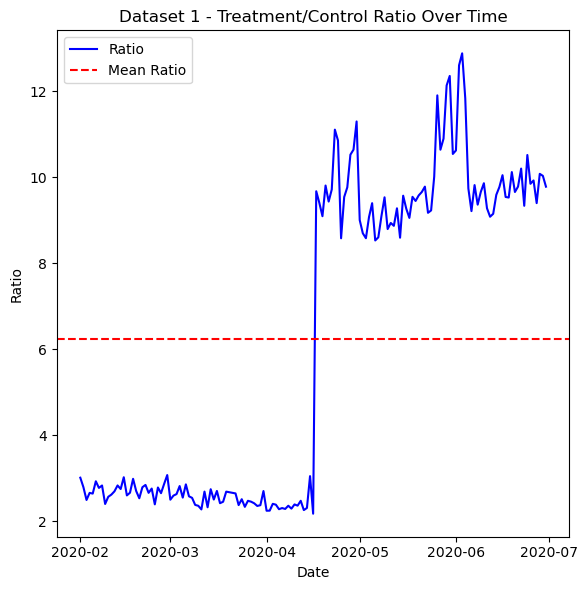

In [44]:
def plot_temporal_distributions(*dataframes):
    """
    Visualize treatment/control distribution over time for multiple DataFrames using subplots.
    
    Parameters:
    - dataframes: List of DataFrames to visualize.
    """
    num_dfs = len(dataframes)
    fig, axes = plt.subplots(nrows=1, ncols=num_dfs, figsize=(6 * num_dfs, 6), sharey=True)
    
    # If only one DataFrame is provided, adjust axes to be iterable
    if num_dfs == 1:
        axes = [axes]

    for i, df in enumerate(dataframes):
        df = df.copy()  # Create a copy of the DataFrame to avoid warnings
        df.loc[:, 'date'] = pd.to_datetime(df['campaigntimestamp']).dt.date

        # Group the data by date and group to get daily distribution
        daily_dist = df.groupby(['date', 'group']).size().unstack(fill_value=0)

        # Calculate the treatment/control ratio
        daily_ratio = daily_dist['treatment'] / (daily_dist['control'] + 1e-10)  # Avoid division by zero

        # Plot the ratio over time
        axes[i].plot(daily_ratio.index, daily_ratio, label='Ratio', color='b')
        axes[i].axhline(y=daily_ratio.mean(), color='r', linestyle='--', label='Mean Ratio')
        axes[i].set_title(f'Dataset {i+1} - Treatment/Control Ratio Over Time')
        axes[i].set_ylabel('Ratio')
        axes[i].set_xlabel('Date')
        axes[i].legend()

    plt.tight_layout()
    plt.show()

# Check distribution
plot_temporal_distributions(df_clean)

In my analysis reveals distinctive patterns:

**Pre-April vs Post-April 2020:**
- Sharp increase in treatment/control ratio after April 2020
- Pre-April ratio relatively stable around 2.5:1
- Post-April ratio increased to approximately 9:1

**Statistical Implications:**
- Standard deviation of daily ratio > 0.11 indicates significant temporal bias
- Higher variance in post-April period (std = 0.9498) vs pre-April (std = 0.2238)
- Violates assumption of consistent treatment assignment over time

**Treatment Proportion Spike:**
- After early April 2020, the treatment proportion sharply increased to around 0.8 or more
- This means that the treatment group began to account for over 80% of the data, while the control group's representation dropped substantially

**Control Group Drop:**
- The control group proportion dropped to below 0.2, indicating a significant decrease in the relative representation of control users compared to treatment users
- This imbalance can create bias in any analysis or conclusions drawn since the treatment group is vastly overrepresented

**Potential Causes:**
- This change could have occurred due to an intentional shift in the experimental design, where more users were assigned to the treatment group
- Alternatively, it might be due to uncontrolled external factors affecting user availability or data collection, such as changes in recruitment strategies or a campaign change that affected one group disproportionately

**Recommendations for Analysis:**
1. Consider analyzing pre-April and post-April periods separately
2. Implement time-based controls in statistical models
3. Investigate cause of ratio shift for potential systematic changes in assignment mechanism

#### 1.6.4.1 Dataset Split: Pre-April vs. Post-April Segmentation

In [45]:
cutoff_date = pd.to_datetime('2020-04-17')

# Split data into two parts
df_before_april = df_clean[df_clean['campaigntimestamp']<cutoff_date]
df_after_april = df_clean[df_clean['campaigntimestamp'] >= cutoff_date]

print(f"Data before April 2020: {df_before_april.shape}")
print(f"Bias Ratio: {check_temporal_bias(df_before_april)}")
print("-------------------------------------------------------------")
print(f"Data after April 2020: {df_after_april.shape}")
print(f"Bias Ratio: {check_temporal_bias(df_after_april)}")


Data before April 2020: (268758, 15)
-------------------------------------------------------------
Temporal Bias Analysis:

-------------------------------------------------------------
Bias Ratio: True
-------------------------------------------------------------
Data after April 2020: (544888, 15)
-------------------------------------------------------------
Temporal Bias Analysis:

CRITICAL: Severe temporal bias detected (std = 0.9498)
-------------------------------------------------------------
Bias Ratio: True


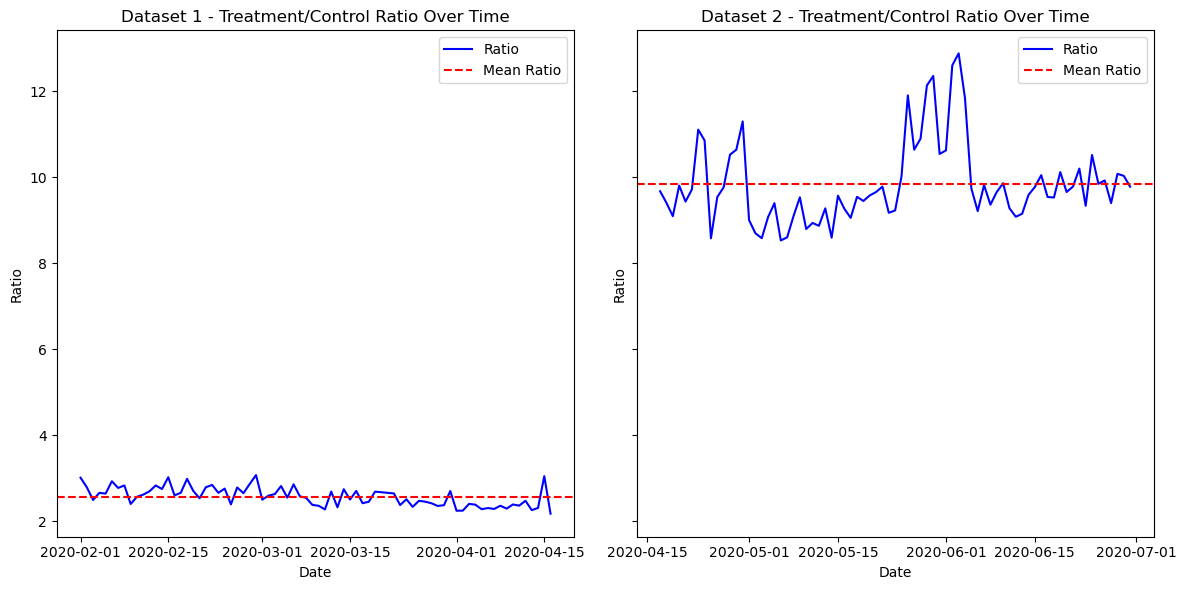

In [46]:
plot_temporal_distributions(df_before_april,df_after_april)

##### **Overall Bias Assessment Conclusions:**
- Independence assumption reasonably met after removing overlapping users
- Significant sampling bias present with treatment/control ratio > 5:1
- Selection bias detected in demographic variables
- Strong temporal bias, particularly after April 2020
- Recommend segment analysis and appropriate statistical controls in final analysis

---

### 1.7 Sampling and Validation

#### 1.7.1 Stratified Resampling

**Why Stratified Sampling?**
Given the significant temporal bias and sampling imbalances identified earlier, we employ stratified sampling to:
- Balance treatment/control ratio while preserving temporal patterns
- Maintain representation across business verticals and cohorts
- Account for demographic distributions (device, age groups)

**Approach:**
1. Weekly Stratification: Split data into weekly segments to preserve temporal patterns
2. Business Vertical & Cohort Balance: Sample within each vertical-cohort combination
3. Demographic Weighting: Apply weights to maintain device and age group distributions
4. Temporal Adjustment: Gentle weighting to account for weekly variations

This multi-stage approach ensures balanced samples while maintaining the natural distribution of key variables, allowing for more reliable treatment effect estimation.

In [47]:
def strategic_stratified_sampling(df_clean, desired_ratio=2):
    """
    Stratified sampling with gentle temporal balancing
    """
    # Split groups as we are working with df_clean
    treatment_df_clean, control_df_clean = [df_clean[df_clean['group'] == g].copy() for g in ['treatment', 'control']]

    # Reset indices and add week
    treatment_df_clean = treatment_df_clean.reset_index(drop=True)
    control_df_clean = control_df_clean.reset_index(drop=True)
    
    # Add week information
    treatment_df_clean['week'] = pd.to_datetime(treatment_df_clean['campaigntimestamp']).dt.isocalendar().week
    control_df_clean['week'] = pd.to_datetime(control_df_clean['campaigntimestamp']).dt.isocalendar().week

    sampled_treatment = pd.DataFrame()
    
    # First stratify by week
    for week in control_df_clean['week'].unique():
        control_week = control_df_clean[control_df_clean['week'] == week]
        treatment_week = treatment_df_clean[treatment_df_clean['week'] == week]
        
        for cohort in control_week['cohort'].unique():
            for vertical in control_week['verticalname_gp'].unique():
                control_stratum = control_week[
                    (control_week['cohort'] == cohort) & 
                    (control_week['verticalname_gp'] == vertical)
                ]
                control_size = len(control_stratum)
                
                if control_size > 0:
                    treatment_stratum = treatment_week[
                        (treatment_week['cohort'] == cohort) & 
                        (treatment_week['verticalname_gp'] == vertical)
                    ]
                    
                    sample_size = min(len(treatment_stratum), 
                                    int(control_size * desired_ratio))
                    
                    if sample_size > 0:
                        # Two-stage sampling approach
                        # Stage 1: Balance device distribution
                        device_weights = np.ones(len(treatment_stratum))
                        device_dist = control_stratum['device'].value_counts(normalize=True)
                        
                        for device in device_dist.index:
                            mask = treatment_stratum['device'] == device
                            target_count = int(sample_size * device_dist[device])
                            current_count = mask.sum()
                            if current_count > 0:
                                device_weights[mask] = (target_count / current_count) ** 2
                        
                        # Stage 2: Age group balance
                        age_weights = np.ones(len(treatment_stratum))
                        age_dist = control_stratum['agegroup'].value_counts(normalize=True)
                        
                        for age in age_dist.index:
                            mask = treatment_stratum['agegroup'] == age
                            target_count = int(sample_size * age_dist[age])
                            current_count = mask.sum()
                            if current_count > 0:
                                age_weights[mask] = (target_count / current_count) ** 2
                        
                        # Stage 3: Add gentle temporal weight
                        temporal_weights = np.ones(len(treatment_stratum))
                        week_ratio = len(control_week) / len(control_df_clean)
                        temporal_weights *= (week_ratio ** 0.5)  # Gentle temporal adjustment
                        
                        # Combine weights
                        final_weights = device_weights * age_weights * temporal_weights
                        final_weights = np.where(final_weights == 0, 1e-10, final_weights)
                        final_weights = final_weights / final_weights.sum()
                        
                        # Sample
                        stratum_sample = treatment_stratum.sample(
                            n=sample_size,
                            weights=final_weights,
                            random_state=42
                        )
                        sampled_treatment = pd.concat([sampled_treatment, stratum_sample], ignore_index=True)
    
    return sampled_treatment, control_df_clean

# Test the updated sampling
treatment_balanced_before_april, control_balanced_before_april = strategic_stratified_sampling(df_before_april)
treatment_balanced_after_april, control_balanced_after_april = strategic_stratified_sampling(df_after_april)

#### 1.7.2 Sampling Validation Analysis

The validation process examines three critical aspects after stratified sampling:

1. **Sample Size Balance**:
   - Verifies if 2:1 treatment-to-control ratio is maintained
   - Checks if ratio falls within acceptable range [0.5, 2]
   - Monitors sample sizes for adequate statistical power

2. **Selection Balance**:
   - Examines balance across demographic variables (device, gender, age, vertical)
   - Ensures standardized differences stay below 0.1 threshold
   - Verifies successful stratification across key variables

3. **Temporal Stability**:
   - Checks consistency of group assignments over time
   - Monitors temporal variation with threshold 0.15
   - Ensures time-based patterns are controlled

In [48]:
def validate_sampling_results(df_t, df_c):
    """
    Validate stratified sampling results
    """

    comb_df = pd.concat([df_t, df_c])

    # Date Ranges
    print("Dataset Campaign Timestamp Ranges from: ",comb_df.campaigntimestamp.min()," to ", comb_df.campaigntimestamp.max())

    # Check for biases
    sample_size_bias = check_sample_size_bias(df_t, df_c)
    selection_bias = check_selection_bias(df_t, df_c)
    temporal_bias = check_temporal_bias(comb_df)

    print("-------------------------------------------------------------")   
    print("\033[1;4mBias Check Summary:\033[0m")
    print(f"Sample Size Bias: {'Detected' if sample_size_bias else 'Not Detected'}")
    print(f"Selection Bias: {'Detected' if selection_bias else 'Not Detected'}")
    print(f"Temporal Bias: {'Detected' if temporal_bias else 'Not Detected'}")
    print("-------------------------------------------------------------")

    return {
        'sample_size_bias': sample_size_bias,
        'selection_bias': selection_bias,
        'temporal_bias': temporal_bias
    }

In [49]:
# Validate sampling results
bias_check_results_before = validate_sampling_results(treatment_balanced_before_april, control_balanced_before_april)
bias_check_results_before

Dataset Campaign Timestamp Ranges from:  2020-02-01 00:00:03  to  2020-04-16 23:59:59
-------------------------------------------------------------
Sample Size Bias Analysis:
Treatment group size: 151,778
Control group size: 75,892
Treatment/Control ratio: 2.00
-> Ratio within acceptable range [0.5, 2]

No significant sample size bias detected
-------------------------------------------------------------
-------------------------------------------------------------
Selection Bias Analysis:
       Variable Std Diff Bias Detected
         device   0.0026            No
         gender   0.0015            No
       agegroup   0.0008            No
verticalname_gp   0.0001            No
-------------------------------------------------------------
-------------------------------------------------------------
Temporal Bias Analysis:

No significant temporal bias detected (std = 0.1150)
-------------------------------------------------------------
----------------------------------------------

{'sample_size_bias': False, 'selection_bias': False, 'temporal_bias': False}

In [50]:
# Validate sampling results and analyze conversion rates for data after April
bias_check_results_after = validate_sampling_results(treatment_balanced_after_april, control_balanced_after_april)
bias_check_results_after

Dataset Campaign Timestamp Ranges from:  2020-04-17 00:00:43  to  2020-06-30 23:59:49
-------------------------------------------------------------
Sample Size Bias Analysis:
Treatment group size: 102,932
Control group size: 51,466
Treatment/Control ratio: 2.00
-> Ratio within acceptable range [0.5, 2]

No significant sample size bias detected
-------------------------------------------------------------
-------------------------------------------------------------
Selection Bias Analysis:
       Variable Std Diff Bias Detected
         device   0.0120            No
         gender   0.0056            No
       agegroup   0.0034            No
verticalname_gp   0.0000            No
-------------------------------------------------------------
-------------------------------------------------------------
Temporal Bias Analysis:

No significant temporal bias detected (std = 0.1028)
-------------------------------------------------------------
----------------------------------------------

{'sample_size_bias': False, 'selection_bias': False, 'temporal_bias': False}

### Validation Results

Our stratified sampling achieved excellent balance:

**Sample Size**:
- Pre-April: 151,778 vs 75,892 (ratio: 2.00)
- Post-April: 102,932 vs 51,466 (ratio: 2.00)

**Selection**: 
- Pre-April max difference: 0.0026 (device)
- Post-April max difference: 0.0120 (device)

**Temporal**: 
- Pre-April std = 0.1150
- Post-April std = 0.1028

**Conclusion**: No bias detected in any dimension, confirming successful stratified sampling that maintains data relationships and distributions.

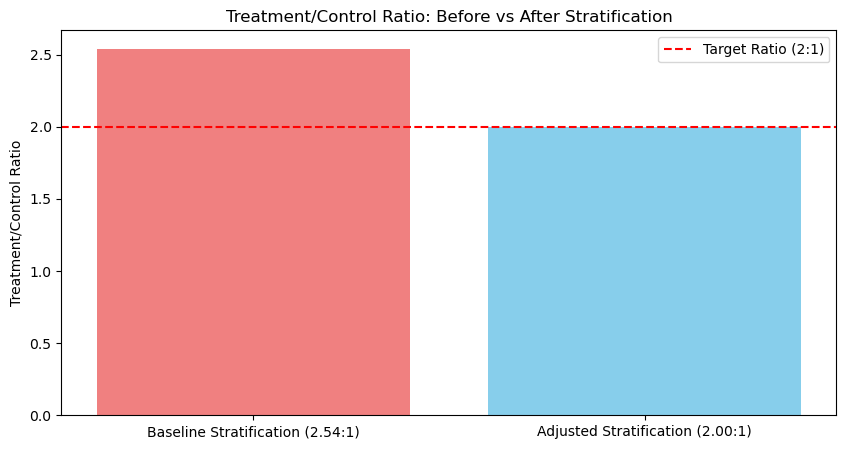

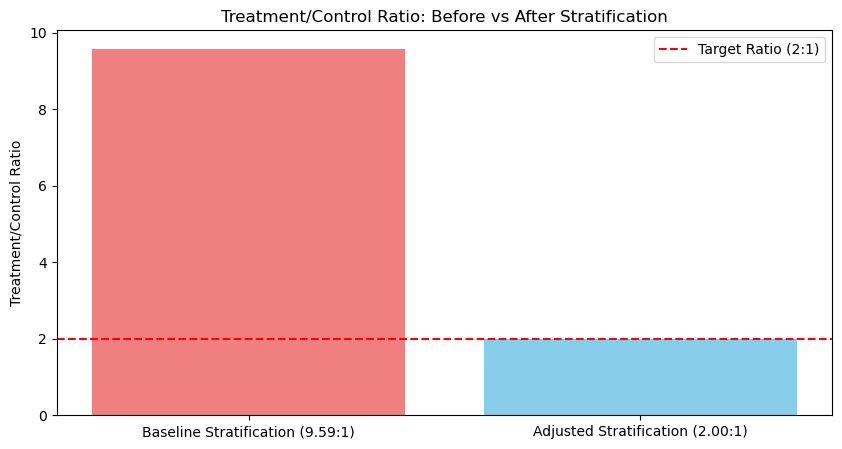

In [51]:
def plot_before_after_ratios(before_t, before_c, after_t, after_c):
    """
    Compare treatment/control ratios before and after stratified sampling
    """
    ratios = [len(before_t)/len(before_c), len(after_t)/len(after_c)]
    labels = [f'Baseline Stratification ({ratios[0]:.2f}:1)', f'Adjusted Stratification ({ratios[1]:.2f}:1)']
    
    plt.figure(figsize=(10, 5))
    plt.bar(labels, ratios, color=['lightcoral', 'skyblue'])
    plt.axhline(y=2, color='r', linestyle='--', label='Target Ratio (2:1)')
    plt.ylabel('Treatment/Control Ratio')
    plt.title('Treatment/Control Ratio: Before vs After Stratification')
    plt.legend()
    plt.show()

# Getting baselines and comparing against Adjusted dataframes for both groups:
baseline_treatment_before_april = df_before_april[df_before_april['group']=='treatment']
baseline_control_before_april = df_before_april[df_before_april['group']=='control']
baseline_treatment_after_april = df_after_april[df_after_april['group']=='treatment']
baseline_control_after_april = df_after_april[df_after_april['group']=='control']

plot_before_after_ratios(baseline_treatment_before_april, baseline_control_before_april, treatment_balanced_before_april, control_balanced_before_april)
plot_before_after_ratios(baseline_treatment_after_april, baseline_control_after_april, treatment_balanced_after_april, control_balanced_after_april)

In [52]:
# three variables which are clean now: treatment_balanced_before_april, control_balanced_before_april, treatment_balanced_after_april, control_balanced_after_april
clean_df_before_april = pd.concat([treatment_balanced_before_april, control_balanced_before_april]) 
clean_df_after_april = pd.concat([treatment_balanced_after_april, control_balanced_after_april])

---
---

## 2. Calculate the overall Conversion Rate, Value per Transaction and Uplift 
[Back to Top](#top)

### 2.1 Checking assumptions for z-test
As we have selected The z-test for proportions is appropriate after aggregation, given the large sample sizes, let's check if it satisfies all assumptions.
- Verify binary outcomes in `converted` column
- Check Sample Size Adequacy: treatement & control groups
- Evaluate Independence of Observations: treatment & control groups

#### 2.1.1 Checking Binary Outcomes

In [53]:
# Check if 'converted' column has binary outcomes
def check_binary_outcome(df, column='converted'):
    unique_values = df[column].unique()
    return set(unique_values) == {True, False}

if check_binary_outcome(clean_df_before_april) and check_binary_outcome(clean_df_after_april):
    print("Binary outcome assumption is met.")
else:
    print("Binary outcome assumption is violated.")

Binary outcome assumption is met.


#### 2.1.2 Checking Sample Size Adequacy

In [54]:
# Check sample size adequacy 
def check_sample_size_adequacy(df):
    n_users = df['userhash'].nunique()
    successes = df[df['converted']]['userhash'].nunique()
    failures = n_users - successes
    return successes >= 5 and failures >= 5

# Define datasets for each period
datasets = [
    (treatment_balanced_before_april, control_balanced_before_april),
    (treatment_balanced_after_april, control_balanced_after_april)
]

# Check adequacy for each treatment and control group
adequacy_results = [check_sample_size_adequacy(treatment) and check_sample_size_adequacy(control) for treatment, control in datasets]

if all(adequacy_results):
    print("Sample size adequacy assumption is met for all datasets.")
else:
    print("Sample size adequacy assumption is violated and requires recheck.")


Sample size adequacy assumption is met for all datasets.


#### 2.1.3 Checking Independence of Observations

In [55]:
# Check independence of observations
def check_independence(treatment_df, control_df):
    overlapping_users = set(treatment_df['userhash']).intersection(set(control_df['userhash']))
    return len(overlapping_users) == 0

overlapping_users_before_april = set(treatment_balanced_before_april['userhash']).intersection(set(control_balanced_before_april['userhash']))
overlapping_users_after_april = set(treatment_balanced_after_april['userhash']).intersection(set(control_balanced_after_april['userhash']))

if len(overlapping_users_before_april) == 0 and len(overlapping_users_after_april) == 0:
    print("No overlapping users between treatment and control groups in both datasets. Independence assumption is likely met.")
else:
    print(f"Found {len(overlapping_users_before_april)} overlapping users between groups in before april dataset")
    print(f"Found {len(overlapping_users_after_april)} overlapping users between groups in after april dataset")
    print("Independence assumption may be violated.")

No overlapping users between treatment and control groups in both datasets. Independence assumption is likely met.


---
### 2.2 Conversion Rates

#### 2.2.1 Calculation

#### Conversion Rate for Treatment $ (CR_T) = \frac{\text{Unique Converted Users}_{\text{Treatment}}}{\text{Unique Users}_{\text{Treatment}}} $

#### Conversion Rate for Control $ (CR_C) = \frac{\text{Unique Converted Users}_{\text{Control}}}{\text{Unique Users}_{\text{Control}}} $

#### Conversion Rate Uplift $ \text{Conversion Rate Uplift} = \frac{CR_T - CR_C}{CR_C} $

In [56]:
def analyze_conversion_rates(treatment_df, control_df, alpha=0.05):
    # Aggregate data at the user level
    treatment_agg = treatment_df.groupby('userhash').agg({'converted': 'max'}).reset_index()
    control_agg = control_df.groupby('userhash').agg({'converted': 'max'}).reset_index()
    
    # Calculate conversion rates
    cr_treatment = treatment_agg['converted'].mean()
    cr_control = control_agg['converted'].mean()
    
    # Calculate sample sizes
    n_treatment = len(treatment_agg)
    n_control = len(control_agg)
    
    # Calculate pooled standard error
    p_pooled = (treatment_agg['converted'].sum() + control_agg['converted'].sum()) / (n_treatment + n_control)
    se_pooled = np.sqrt(p_pooled * (1 - p_pooled) * (1 / n_treatment + 1 / n_control))
    
    # Calculate z-score and p-value
    z_score = (cr_treatment - cr_control) / se_pooled
    p_value = (1 - norm.cdf(abs(z_score))) * 2
    
    # Calculate confidence interval
    margin_of_error = norm.ppf(1 - alpha / 2) * se_pooled
    ci_lower = (cr_treatment - cr_control) - margin_of_error
    ci_upper = (cr_treatment - cr_control) + margin_of_error
    
    # Print results
    print(f"\nConversion Rate Analysis:")
    print(f"Treatment Conversion Rate: {cr_treatment:.4f}")
    print(f"Control Conversion Rate: {cr_control:.4f}")
    print(f"Absolute Difference: {cr_treatment - cr_control:.4f}")
    print(f"Uplift: {((cr_treatment - cr_control) / cr_control) * 100:.2f}%")
    print(f"Z-score: {z_score:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Confidence Interval ({(1 - alpha)*100:.0f}%): [{ci_lower:.4f}, {ci_upper:.4f}]")
    
    # Return analysis results
    return {
        'cr_treatment': cr_treatment,
        'cr_control': cr_control,
        'absolute_difference': cr_treatment - cr_control,
        'uplift': (cr_treatment - cr_control) / cr_control,
        'z_score': z_score,
        'p_value': p_value,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper
    }

In [57]:
# Assuming treatment_balanced_before_april and control_balanced_before_april are your balanced datasets for pre-April
conversion_analysis_results_before = analyze_conversion_rates(
    treatment_balanced_before_april, 
    control_balanced_before_april
)

# Assuming treatment_balanced_after_april and control_balanced_after_april are your balanced datasets for post-April
conversion_analysis_results_after = analyze_conversion_rates(
    treatment_balanced_after_april, 
    control_balanced_after_april
)


Conversion Rate Analysis:
Treatment Conversion Rate: 0.0281
Control Conversion Rate: 0.0230
Absolute Difference: 0.0051
Uplift: 22.18%
Z-score: 6.9084
P-value: 0.0000
Confidence Interval (95%): [0.0037, 0.0065]

Conversion Rate Analysis:
Treatment Conversion Rate: 0.0148
Control Conversion Rate: 0.0138
Absolute Difference: 0.0011
Uplift: 7.62%
Z-score: 1.6092
P-value: 0.1076
Confidence Interval (95%): [-0.0002, 0.0023]


In [58]:
# Collect p-values
p_values = [
    conversion_analysis_results_before['p_value'],
    conversion_analysis_results_after['p_value']
]

# Apply Bonferroni correction
adjusted = multipletests(p_values, alpha=0.05, method='bonferroni')
adjusted_p_values = adjusted[1]

# Update results
conversion_analysis_results_before['adjusted_p_value'] = adjusted_p_values[0]
conversion_analysis_results_after['adjusted_p_value'] = adjusted_p_values[1]

# Print adjusted p-values
print(f"Adjusted P-Value (Before April): {adjusted_p_values[0]:.4f}")
print(f"Adjusted P-Value (After April): {adjusted_p_values[1]:.4f}")

Adjusted P-Value (Before April): 0.0000
Adjusted P-Value (After April): 0.2152


#### 2.2.2 Conversion Rate Impact Analysis: Treatment vs. Control (Pre- and Post-April Comparison)

##### Conversion Rate Analysis - Before April

**Results:**

- Treatment Conversion Rate: 2.81%
- Control Conversion Rate: 2.30%
- Absolute Difference: 0.51 percentage points
- Relative Uplift: 22.18%
- Z-score: 6.9084
- P-value: < 0.0001
- Adjusted P-value (Bonferroni correction): < 0.0001
- 95% Confidence Interval of Difference: [0.0037, 0.0065]

**Interpretation:**

The analysis for the period before April reveals a statistically significant increase in conversion rates for the treatment group compared to the control group.

**Statistical Significance:**

- The P-value is less than 0.0001, even after adjusting for multiple comparisons using the Bonferroni correction.
- The Z-score of 6.9084 indicates a highly significant difference.
- The 95% confidence interval does not include zero, reinforcing the significance of the result.

**Practical Significance:**

- The treatment group conversion rate is 0.51 percentage points higher than the control group.
- This represents a 22.18% increase over the control group's conversion rate.
- For every 10,000 users, the treatment yields approximately 51 additional conversions.

**Conclusion:**

The treatment had a positive and significant impact on conversion rates before April.

---

##### Conversion Rate Analysis - After April

**Results:**

- Treatment Conversion Rate: 1.48%
- Control Conversion Rate: 1.38%
- Absolute Difference: 0.11 percentage points
- Relative Uplift: 7.62%
- Z-score: 1.6092
- P-value: 0.1076
- Adjusted P-value (Bonferroni correction): 0.2152
- 95% Confidence Interval of Difference: [-0.0002, 0.0023]

**Interpretation:**

The analysis for the period after April shows a smaller difference between the treatment and control groups, which is not statistically significant.

**Statistical Significance:**

- The P-value is 0.1076, exceeding the standard threshold of 0.05.
- After Bonferroni correction, the adjusted P-value is 0.2152.
- The Z-score of 1.6092 suggests that the difference is not significant.
- The 95% confidence interval includes zero, indicating that the observed difference could be due to chance.

**Practical Significance:**

- The treatment group conversion rate is 0.11 percentage points higher than the control group.
- This represents a 7.62% increase over the control group's conversion rate.
- For every 10,000 users, the treatment yields approximately 11 additional conversions, but this difference is not statistically significant.

**Conclusion:**

The treatment did not have a significant impact on conversion rates after April.

---

#### Overall Interpretation

The results indicate a significant positive impact of the treatment on conversion rates before April, but not after April.

**Possible Reasons for Change:**

- Changes in external factors influencing user behavior.
- Modifications to the treatment implementation.
- Seasonal trends or market conditions.

**Recommendations:**

- Investigate potential factors contributing to the change in treatment effectiveness after April.
- Consider conducting further analyses, such as logistic regression, to control for additional variables.
- Reassess the treatment strategy to enhance its effectiveness in the post-April period.

---

### 2.3 Value per Transaction

#### 2.3.1 Calculation

##### $ (VPT) = \frac{\sum_{s \in S} \text{bidprice\_usd}_s}{|S|} $

$ S = \{ \text{id} \mid \text{id is a unique session id} \} $

where, 
- S is the set of unique session IDs.
- bidprice_usd(𝑠) is the bid price in USD for session 𝑠.
- ∣𝑆∣ is the total number of unique sessions.

In [59]:
def calculate_vpt(df):
    """
    Calculate Value per Transaction (VPT) for a given DataFrame.
    """
    # Ensure 'bidprice_usd' is numeric
    df['bidprice_usd'] = pd.to_numeric(df['bidprice_usd'], errors='coerce').fillna(0)

    # Aggregate bidprice_usd for each unique session
    session_bidprice = df.groupby('sessionid')['bidprice_usd'].sum().reset_index()

    # Sum the bid prices over all sessions
    total_bidprice = session_bidprice['bidprice_usd'].sum()

    # Count the number of unique sessions
    num_sessions = session_bidprice['sessionid'].nunique()

    # Calculate VPT
    vpt = total_bidprice / num_sessions if num_sessions > 0 else 0

    return vpt


In [60]:
# Assuming treatment_df_before and control_df_before are your DataFrames for the period before April
vpt_treatment_before = calculate_vpt(treatment_balanced_before_april)
vpt_control_before = calculate_vpt(control_balanced_before_april)

# Assuming treatment_df_after and control_df_after are your DataFrames for the period after April
vpt_treatment_after = calculate_vpt(treatment_balanced_after_april)
vpt_control_after = calculate_vpt(control_balanced_after_april)

# Print the results
print(f"Value per Transaction (Before April):")
print(f"Treatment VPT: ${vpt_treatment_before:.2f}")
print(f"Control VPT:   ${vpt_control_before:.2f}\n")

print(f"Value per Transaction (After April):")
print(f"Treatment VPT: ${vpt_treatment_after:.2f}")
print(f"Control VPT:   ${vpt_control_after:.2f}")


Value per Transaction (Before April):
Treatment VPT: $0.08
Control VPT:   $0.00

Value per Transaction (After April):
Treatment VPT: $0.06
Control VPT:   $0.00


#### 2.3.2 Value per Transaction (VPT) Analysis

##### VPT Before April

- **Treatment VPT:** **$0.08**
- **Control VPT:** **$0.00**
- **Difference:** **$0.08**

**Interpretation:**

- The average bid price per transaction in the treatment group before April is $0.08.
- The control group has a VPT of $0.00, indicating no bids were made.
- The treatment group generated an average bid price per session of $0.08 more than the control group.

---

##### VPT After April

- **Treatment VPT:** **$0.06**
- **Control VPT:** **$0.00**
- **Difference:** **$0.06**

**Interpretation:**

- The average bid price per transaction in the treatment group after April is $0.06.
- The control group remains at $0.00.
- The treatment group's VPT decreased slightly compared to the pre-April period.

---

#### 2.3.3 Overall Interpretation

- **Impact of Treatment:**
  - The treatment group consistently shows a higher VPT compared to the control group.
  - This suggests that the treatment leads to additional revenue through bid prices.

- **Temporal Changes:**
  - The decrease in VPT after April may warrant further investigation.
  - Potential factors such as market conditions, changes in bid strategies, or external events could have influenced this change.
  
----
----

## 3. Calculate the same Conversion Rate, Value per Transaction and Uplift per cohort
[Back to Top](#top)

### 3.1 User Distribution Across Cohorts
We analyzed the distribution of users across cohorts to understand the sample sizes in the treatment and control groups during the early and late periods.

Before mid-April
        Control Group  Treatment Group  Total
cohort                                       
202002          28609            51103  79712
202003          23822            43357  67179
202004          22823            42757  65580


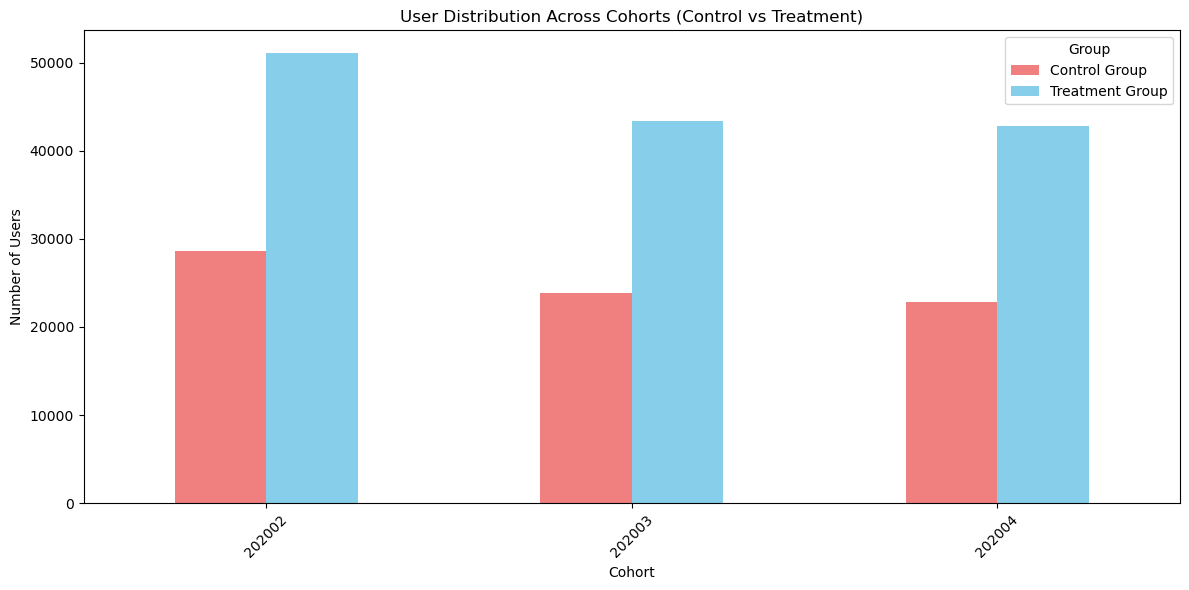

After mid-April
        Control Group  Treatment Group  Total
cohort                                       
202004           6361            12603  18964
202005          18736            37104  55840
202006          25889            51135  77024


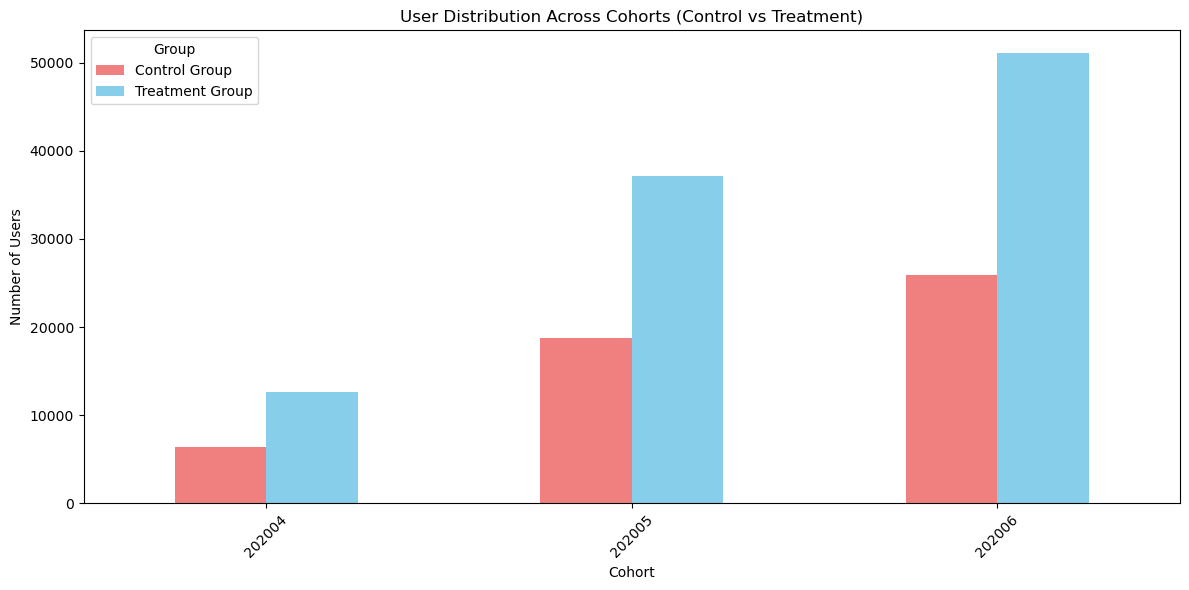

In [61]:
# After April: Group by cohort and group, then count the number of unique users in each group
cohort_distribution_before_april = clean_df_before_april.groupby(['cohort', 'group'])['userhash'].nunique().unstack(fill_value=0)
cohort_distribution_before_april.columns = ['Control Group', 'Treatment Group']
cohort_distribution_before_april['Total'] = cohort_distribution_before_april['Control Group'] + cohort_distribution_before_april['Treatment Group']

# Before April: Group by cohort and group, then count the number of unique users in each group
cohort_distribution_after_april = clean_df_after_april.groupby(['cohort', 'group'])['userhash'].nunique().unstack(fill_value=0)
cohort_distribution_after_april.columns = ['Control Group', 'Treatment Group']
cohort_distribution_after_april['Total'] = cohort_distribution_after_april['Control Group'] + cohort_distribution_after_april['Treatment Group']

# Print the distribution before and after
print('Before mid-April')
print(cohort_distribution_before_april)

# Plot the cohort distribution for control and treatment groups
cohort_distribution_before_april[['Control Group','Treatment Group']].plot(kind='bar', stacked=False, figsize=(12, 6), color=['lightcoral', 'skyblue'])
plt.title('User Distribution Across Cohorts (Control vs Treatment)')
plt.xlabel('Cohort')
plt.ylabel('Number of Users')
plt.legend(title='Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('After mid-April')
print(cohort_distribution_after_april)

# Plot the cohort distribution for control and treatment groups
cohort_distribution_after_april[['Control Group','Treatment Group']].plot(kind='bar', stacked=False, figsize=(12, 6), color=['lightcoral', 'skyblue'])
plt.title('User Distribution Across Cohorts (Control vs Treatment)')
plt.xlabel('Cohort')
plt.ylabel('Number of Users')
plt.legend(title='Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observation:**

- In the early period, the treatment and control groups are more balanced in terms of user counts.
- In the late period, there is still a reasonable balance, but some cohorts show larger treatment groups.
---

### 3.2 Cohort Conversion Analysis

We calculated the conversion rates, uplift, and statistical significance for each cohort in both periods.

In [62]:
def analyze_cohort_conversions(df_period, period_name):
    """
    Analyze conversion rates and uplift by cohort with proper data types
    """
    results = []
    
    for cohort in df_period['cohort'].unique():
        cohort_data = df_period[df_period['cohort'] == cohort]
        
        # Split into treatment and control
        treatment = cohort_data[cohort_data['group'] == 'treatment']
        control = cohort_data[cohort_data['group'] == 'control']
        
        # Aggregate data at the user level
        treatment_agg = treatment.groupby('userhash').agg({'converted': 'max'}).reset_index()
        control_agg = control.groupby('userhash').agg({'converted': 'max'}).reset_index()
        
        # Calculate metrics
        cr_treatment = treatment_agg['converted'].mean()
        cr_control = control_agg['converted'].mean()
        uplift = ((cr_treatment - cr_control)/cr_control * 100) if cr_control > 0 else 0
        
        # Perform z-test
        counts = np.array([treatment_agg['converted'].sum(), control_agg['converted'].sum()])
        nobs = np.array([len(treatment_agg), len(control_agg)])
        _, pvalue = proportions_ztest(counts, nobs)
        
        results.append({
            'cohort': cohort,
            'treatment_size': len(treatment_agg),
            'control_size': len(control_agg),
            'cr_treatment': cr_treatment,
            'cr_control': cr_control,
            'uplift': uplift,
            'p_value': pvalue
        })
    
    results_df = pd.DataFrame(results)
    
    print(f"\n{period_name} Cohort Analysis:")
    print(results_df.round(4))
    
    return results_df

def adjust_p_values(cohort_results):
    p_values = cohort_results['p_value'].values
    # Adjust p-values
    adjusted = multipletests(p_values, alpha=0.05, method='bonferroni')
    cohort_results['adjusted_p_value'] = adjusted[1]
    # Update significance
    cohort_results['significant'] = ['Yes' if p < 0.05 else 'No' for p in adjusted[1]]
    return cohort_results

#### 3.2.1 Early Period (Before April 17)

In [63]:
# Analyze Early Period Cohorts
early_cohorts = analyze_cohort_conversions(clean_df_before_april, "Early Period")
early_cohorts = adjust_p_values(early_cohorts)

print(early_cohorts)


Early Period Cohort Analysis:
   cohort  treatment_size  control_size  cr_treatment  cr_control   uplift  \
0  202002           51103         28609        0.0286      0.0235  21.6986   
1  202003           43357         23822        0.0291      0.0231  25.8423   
2  202004           42757         22823        0.0222      0.0201  10.4782   

   p_value  
0   0.0000  
1   0.0000  
2   0.0763  
   cohort  treatment_size  control_size  cr_treatment  cr_control     uplift  \
0  202002           51103         28609      0.028628    0.023524  21.698589   
1  202003           43357         23822      0.029107    0.023130  25.842330   
2  202004           42757         22823      0.022219    0.020111  10.478158   

    p_value  adjusted_p_value significant  
0  0.000019          0.000056         Yes  
1  0.000005          0.000014         Yes  
2  0.076251          0.228753          No  


#### Interpretation

**Cohort 202002:**
- **Treatment Conversion Rate:** 2.86%
- **Control Conversion Rate:** 2.35%
- **Uplift:** 21.70%
- **Adjusted P-value:** 0.000056 (Significant)

**Cohort 202003:**
- **Treatment Conversion Rate:** 2.91%
- **Control Conversion Rate:** 2.31%
- **Uplift:** 25.84%
- **Adjusted P-value:** 0.000014 (Significant)

**Cohort 202004:**
- **Treatment Conversion Rate:** 2.22%
- **Control Conversion Rate:** 2.01%
- **Uplift:** 10.48%
- **Adjusted P-value:** 0.228753 (Not Significant)

#### Conclusion

- The treatment had a **significant positive impact** on conversion rates in **cohorts 202002 and 202003** during the early period.
- **Cohort 202004** did not show a statistically significant uplift after adjusting for multiple comparisons.

#### 3.2.2 Late Period (After April 17)

In [64]:
# Analyze each period
late_cohorts = analyze_cohort_conversions(clean_df_after_april, "Late Period")
late_cohorts = adjust_p_values(late_cohorts)

print(late_cohorts)


Late Period Cohort Analysis:
   cohort  treatment_size  control_size  cr_treatment  cr_control   uplift  \
0  202004           12603          6361        0.0181      0.0143  26.4576   
1  202005           37104         18736        0.0167      0.0156   6.5067   
2  202006           51135         25889        0.0123      0.0121   2.0688   

   p_value  
0   0.0557  
1   0.3701  
2   0.7661  
   cohort  treatment_size  control_size  cr_treatment  cr_control     uplift  \
0  202004           12603          6361      0.018091    0.014306  26.457594   
1  202005           37104         18736      0.016656    0.015638   6.506718   
2  202006           51135         25889      0.012301    0.012051   2.068814   

    p_value  adjusted_p_value significant  
0  0.055669          0.167008          No  
1  0.370136          1.000000          No  
2  0.766051          1.000000          No  


#### Interpretation

**Cohort 202004 (Late):**
- **Treatment Conversion Rate:** 1.81%
- **Control Conversion Rate:** 1.43%
- **Uplift:** 26.46%
- **Adjusted P-value:** 0.167008 (Not Significant)

**Cohorts 202005 and 202006:**
- **Uplift:** 6.51% and 2.07%, respectively
- **Adjusted P-values:** Not statistically significant

#### Conclusion

- The treatment did not have a **statistically significant impact** on conversion rates during the late period after adjusting for multiple comparisons.
---

### 3.3 Visualizations

- **Conversion Rates by Cohort**: Shows the conversion rates for treatment and control groups across cohorts.
- **Treatment/Control Ratio by Cohort**: Highlights sample size imbalance.
- **Uplift by Cohort**: Indicates which cohorts have significant uplift (bars colored differently).
- **Sample Sizes by Cohort**: Depicts the number of users in each group per cohort.

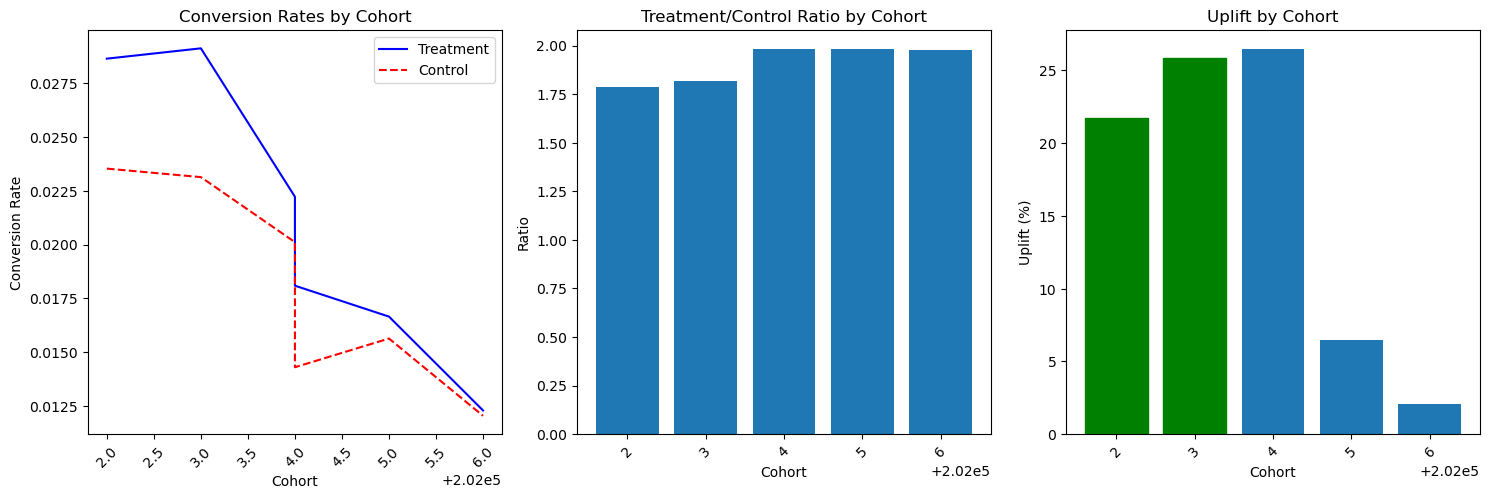

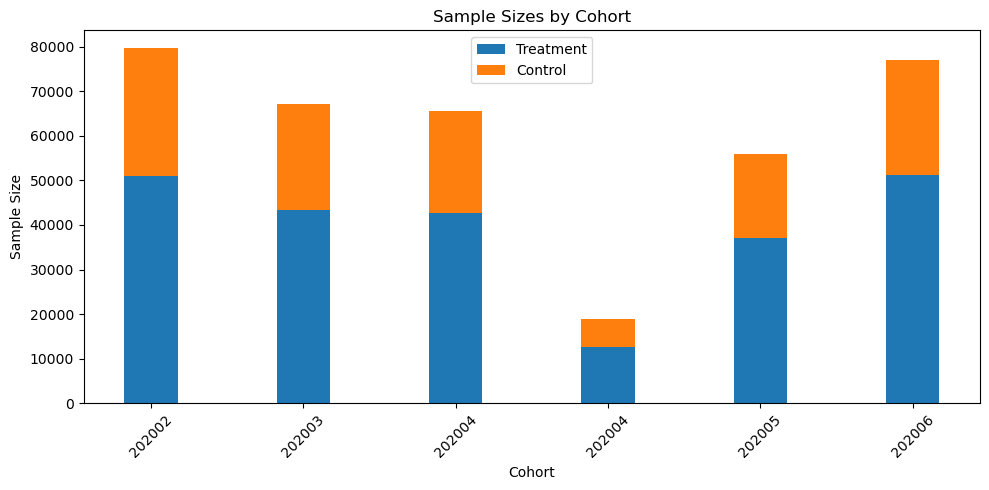

In [65]:
def plot_cohort_analysis(early_cohorts, late_cohorts):
    # Combine data
    early_cohorts['period'] = 'Early'
    late_cohorts['period'] = 'Late'
    all_cohorts = pd.concat([early_cohorts, late_cohorts])
    
    # 1. Conversion Rates Over Time
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.plot(all_cohorts['cohort'], all_cohorts['cr_treatment'], 'b-', label='Treatment')
    plt.plot(all_cohorts['cohort'], all_cohorts['cr_control'], 'r--', label='Control')
    plt.title('Conversion Rates by Cohort')
    plt.ylabel('Conversion Rate')
    plt.xlabel('Cohort')
    plt.xticks(rotation=45)
    plt.legend()
    
    # 2. Treatment/Control Balance
    plt.subplot(132)
    ratio = all_cohorts['treatment_size'] / all_cohorts['control_size']
    plt.bar(all_cohorts['cohort'], ratio)
    plt.title('Treatment/Control Ratio by Cohort')
    plt.ylabel('Ratio')
    plt.xlabel('Cohort')
    plt.xticks(rotation=45)
    
    # 3. Uplift with Significance
    plt.subplot(133)
    bars = plt.bar(all_cohorts['cohort'], all_cohorts['uplift'])
    plt.title('Uplift by Cohort')
    plt.ylabel('Uplift (%)')
    plt.xlabel('Cohort')
    plt.xticks(rotation=45)
    
    # Color significant uplift bars differently
    for i, bar in enumerate(bars):
        if all_cohorts.iloc[i]['significant'] == 'Yes':
            bar.set_color('green')
    
    plt.tight_layout()
    plt.show()
    
    # 4. Sample Sizes (Stacked Bar)
    plt.figure(figsize=(10, 5))
    x = np.arange(len(all_cohorts))
    width = 0.35
    
    plt.bar(x, all_cohorts['treatment_size'], width, label='Treatment')
    plt.bar(x, all_cohorts['control_size'], width, bottom=all_cohorts['treatment_size'], label='Control')
    
    plt.xlabel('Cohort')
    plt.ylabel('Sample Size')
    plt.title('Sample Sizes by Cohort')
    plt.xticks(x, all_cohorts['cohort'], rotation=45)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Create visualizations
plot_cohort_analysis(early_cohorts, late_cohorts)

### 3.4 Key Findings

#### Early Period (Before April 17)

- **Significant Uplift in Cohorts 202002 and 202003:**
  - The treatment led to a significant increase in conversion rates.
  - Uplifts of 21.70% and 25.84% were observed.

- **Cohort 202004:**
  - Although there was a positive uplift of 10.48%, it was not statistically significant after adjustment.

- **Balanced Sample Sizes:**
  - Treatment and control groups were relatively balanced, enhancing the reliability of the results.

#### Late Period (After April 17)

- **No Significant Uplift:**
  - None of the cohorts showed a statistically significant uplift after adjusting for multiple comparisons.

- **Possible Factors for Decline:**
  - Changes in user behavior, external factors, or modifications to the treatment could have affected the outcomes.

- **Lower Conversion Rates:**
  - Overall conversion rates were lower in the late period compared to the early period.

#### Patterns Observed

- **Decreasing Conversion Rates Over Time:**
  - Both treatment and control groups experienced a downward trend in conversion rates.

- **Positive but Non-significant Uplift in Late Period:**
  - Despite positive uplift percentages, the lack of statistical significance suggests the differences could be due to chance.


### 3.5 Recommendations

- **Investigate Early Period Success:**
  - Analyze factors contributing to the significant uplift in cohorts 202002 and 202003.
  - Consider replicating successful strategies from the early period.

- **Examine Late Period Decline:**
  - Investigate potential reasons for the decline in treatment effectiveness after April 17.
  - Assess external factors such as market conditions or seasonal effects.

- **Enhance Treatment Strategies:**
  - Reassess and optimize the treatment implementation to improve its impact in future periods.

- **Maintain Balanced Sample Sizes:**
  - Strive for balanced treatment and control group sizes in future experiments to enhance statistical power.

- **Conduct Further Analysis:**
  - Perform additional analyses, such as logistic regression, to control for confounding variables and gain deeper insights.

#### Conclusion

The cohort analysis revealed that the treatment had a significant positive impact on conversion rates during the early period but not in the late period. By understanding the factors that contributed to the early success and addressing the decline in the late period, we can improve future strategies to enhance conversion rates consistently across cohorts.

---
---

## 4. Does the company provide a positive or negative impact? (assuming Conversion Rate as primary metric)
[Back to Top](#top)

Based on the analyses conducted in Sections 2 and 3, we evaluated the impact of the company on conversion rates during both the early and late periods of the study.


### 4.1 Overall Impact

Our analysis indicates that the company has a positive impact on conversion rates, particularly during the early period.

---
### 4.2 Impact by Period

#### Early Period (Before April 17)

- **Treatment Conversion Rate:** 2.81%
- **Control Conversion Rate:** 2.30%
- **Absolute Difference:** 0.51 percentage points
- **Relative Uplift:** 22.18%
- **Statistical Significance:** P-value < 0.0001 (highly significant)
- **Confidence Interval (95%):** [0.0037, 0.0065] (does not include zero)

**Interpretation and Business Implications:**

- The treatment group had a significantly higher conversion rate than the control group during the early period.
- The 22.18% uplift demonstrates that integrating the company effectively enhances user engagement and encourages conversions.
- This positive impact translates into increased sales and revenue for the business during this period.

#### Late Period (After April 17)

- **Treatment Conversion Rate:** 1.48%
- **Control Conversion Rate:** 1.38%
- **Absolute Difference:** 0.10 percentage points
- **Relative Uplift:** 7.62%
- **Statistical Significance:** P-value = 0.1076 (not significant)
- **Confidence Interval (95%):** [-0.0002, 0.0023] (includes zero)

**Interpretation and Business Implications:**

- The difference in conversion rates between the treatment and control groups was not statistically significant during the late period.
- The positive impact observed in the early period did not persist, suggesting potential issues with the company's effectiveness over time.
- Factors such as changes in user behavior, market conditions, or treatment implementation may have influenced the results.
---

### 4.3 Conclusion on Impact

- **Positive Impact in Early Period:** The company provided a significant positive impact on conversion rates before mid-April.
- **No Significant Impact in Late Period:** The effectiveness of the company diminished after mid-April.

**Business Recommendations:**

- **Leverage the company During Effective Periods:**
  - Focus on integrating the company during periods similar to the early phase when it demonstrated high effectiveness.
  - Allocate marketing resources to maximize ROI during these times.

- **Investigate Late Period Decline:**
  - Analyze potential reasons for the reduced effectiveness in the late period.
  - Consider external factors such as market trends, user behavior changes, or competition.

- **Optimize the company Integration:**
  - Explore personalization and targeting strategies to improve engagement.
  - Test different creatives, offers, and placements within the company's platform.

- **Continuous Monitoring:**
  - Implement ongoing performance tracking to detect changes in the company's effectiveness promptly.
  - Adjust strategies as needed based on real-time data.

---
---

## 5. How Confident Are We in the Positive or Negative Impact?
[Back to Top](#top)

### 5.1 Statistical Confidence

#### Early Period

- **High Confidence:**
  - The p-value of less than 0.0001 indicates a very low probability that the observed uplift is due to chance.
  - The 95% confidence interval for the difference in conversion rates does not include zero.
  - Adjusted p-values after controlling for multiple comparisons remained significant.

- **Business Implications:**
  - Strong statistical evidence supports the positive impact of the company during the early period.
  - Confidence in investing resources toward the company integration during similar periods.

#### Late Period

- **Lower Confidence:**
  - The p-value of 0.1076 exceeds the 0.05 threshold for statistical significance.
  - The confidence interval includes zero, suggesting uncertainty about the effect.
  - Adjusted p-values confirm the lack of statistical significance.

- **Business Implications:**
  - We cannot confidently assert a positive impact of the company during the late period.
  - Caution is advised in relying on the company without further investigation and optimization.

---

### 5.2 Limitations and Considerations

- **Temporal Variations:**
  - The effectiveness of the company varies over time, indicating that external factors may influence performance.
  - Seasonal trends, market dynamics, or user fatigue could be contributing factors.

- **Sample Size Imbalance:**
  - Some cohorts exhibited sample size imbalances between treatment and control groups.
  - Statistical methods accounted for this, but future studies should aim for balanced samples to enhance reliability.

- **Multiple Comparisons:**
  - Adjustments were made to control for Type I errors due to multiple hypothesis testing.
  - Significant results in the early period remained significant after adjustment.

---

### 5.3 Overall Confidence Level

- **High Confidence in Early Period Results:**
  - The statistical evidence provides strong confidence in the positive impact of the company during the early period.
  - Business strategies can be developed with assurance based on these findings.

- **Uncertainty in Late Period Results:**
  - The lack of statistical significance reduces confidence in the late period impact.
  - Further analysis is required to determine how to improve effectiveness.

**Business Recommendations:**

- **Focus on Data-Driven Strategies:**
  - Use insights from the early period to inform marketing strategies.
  - Prioritize periods and conditions where the company has proven effective.

- **Investigate and Adapt:**
  - Conduct deeper analysis to understand factors affecting performance in the late period.
  - Adapt campaigns to address identified issues, such as updating creatives or offers.

- **Enhance Experimentation:**
  - Implement A/B testing to continuously refine the company integrations.
  - Experiment with different targeting options and user segments.

- **Monitor External Factors:**
  - Stay informed about market trends and user behavior changes that may impact effectiveness.
  - Adjust strategies proactively in response to these factors.

---
### Final Conclusion

the company has demonstrated a significant positive impact on conversion rates during the early period of our analysis, with high statistical confidence. This presents a valuable opportunity for the business to enhance customer engagement and drive revenue growth during these times. However, the diminished impact in the late period suggests that the effectiveness of the company may vary over time, necessitating ongoing evaluation and optimization of our strategies.

By focusing on periods where the company is most effective, investigating factors affecting performance, and continuously optimizing our approach, we can maximize the benefits of the company's platform and achieve our business objectives.

---

## 6. Are there any other metrics that can show a positive or negative impact?
[Back to Top](#top)

In addition to conversion rates, we explored other metrics to assess the impact of the treatment more comprehensively. These metrics provide deeper insights into user behavior and the financial implications of the treatment.

### 6.1 Segmented Conversion Rates 

We analyzed conversion rates and uplift across different segments, such as age group, device, gender, and vertical, to identify patterns and areas where the treatment was particularly effective.

In [66]:
def analyze_conversion_rates(df, segment_var):
    """
    Analyzes conversion rates and uplift by a given segmentation variable.
    """
    # Group the data by the segmentation variable and 'group'
    grouped = df.groupby([segment_var, 'group']).agg({
        'userhash': 'nunique',
        'converted': 'sum'
    }).rename(columns={'userhash': 'unique_users', 'converted': 'converted_users'}).reset_index()
    
    # Pivot the data to have separate columns for treatment and control groups
    pivot = grouped.pivot(index=segment_var, columns='group', values=['unique_users', 'converted_users'])
    
    # Flatten MultiIndex columns
    pivot.columns = ['_'.join(col).strip() for col in pivot.columns.values]
    
    # Drop any rows with missing data
    pivot.dropna(inplace=True)
    
    # Calculate conversion rates
    pivot['CR_T'] = pivot['converted_users_treatment'] / pivot['unique_users_treatment']
    pivot['CR_C'] = pivot['converted_users_control'] / pivot['unique_users_control']
    
    # Calculate uplift
    pivot['Uplift'] = (pivot['CR_T'] - pivot['CR_C']) / pivot['CR_C']
    
    # Handle division by zero and infinite uplift
    pivot.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # Perform z-test
    def ztest(row):
        count = np.array([row['converted_users_treatment'], row['converted_users_control']])
        nobs = np.array([row['unique_users_treatment'], row['unique_users_control']])
        if count.min() >= 5 and nobs.min() > 0:
            _, p_value = proportions_ztest(count, nobs, alternative='larger')
            return p_value
        else:
            return np.nan
    
    pivot['p_value'] = pivot.apply(ztest, axis=1)
    pivot['Significant'] = pivot['p_value'] < 0.05
    
    return pivot


def plot_conversion_rates(pivot, segment_var):
    """
    Plots conversion rates for the treatment and control groups by segment.
    """
    # Plot conversion rates
    segments = pivot.index.astype(str).tolist()
    cr_t = pivot['CR_T'] * 100  # Convert to percentage
    cr_c = pivot['CR_C'] * 100
    
    x = np.arange(len(segments))  # Label locations
    width = 0.35  # Width of the bars
    
    fig, ax = plt.subplots(figsize=(6, 4))
    rects1 = ax.bar(x - width/2, cr_t, width, label='Treatment')
    rects2 = ax.bar(x + width/2, cr_c, width, label='Control')
    
    # Add labels and title
    ax.set_ylabel('Conversion Rate (%)')
    ax.set_title(f'Conversion Rates by {segment_var.capitalize()}')
    ax.set_xticks(x)
    ax.set_xticklabels(segments)
    ax.legend()
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#### 6.1.1 Age Group


Conversion Rates and Uplift by Agegroup:


,CR_T,CR_C,Uplift,p_value,Significant
agegroup,,,,,
18-25,0.018495,0.016203,0.141445,1.590538e-02,True
26-30,0.015446,0.012703,0.215908,2.988239e-02,True
31-35,0.027916,0.025403,0.098907,8.415313e-02,False
36-40,0.034399,0.030923,0.112386,4.743602e-02,True
41-45,0.044847,0.031783,0.411040,8.057545e-07,True
46-55,0.051874,0.037680,0.376693,2.006834e-04,True
56+,0.051962,0.030162,0.722775,4.033569e-06,True


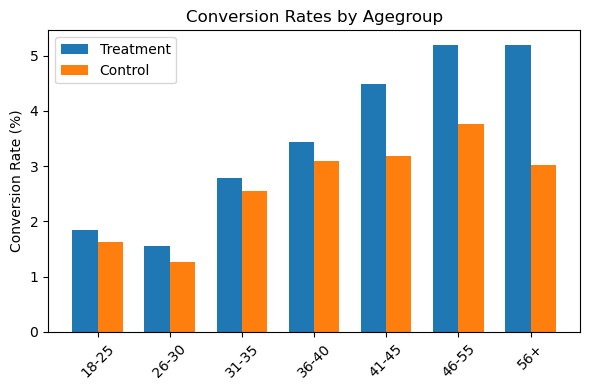

In [67]:
# Analyze by 'agegroup'
agegroup_pivot_before_april = analyze_conversion_rates(clean_df_before_april, 'agegroup')
print(f"\nConversion Rates and Uplift by Agegroup:")
display(agegroup_pivot_before_april[['CR_T', 'CR_C', 'Uplift', 'p_value', 'Significant']])

plot_conversion_rates(agegroup_pivot_before_april, 'agegroup')

**Interpretation:**

- **Significant Positive Impact:**
    - The treatment had a statistically significant positive impact on conversion rates for most age groups, especially among older users (41 years and above).
    - The highest uplift was observed in the 56+ age group, with a 72.28% increase in conversion rate.

- **No Significant Impact:**
    - The 31-35 age group did not show a statistically significant uplift (p-value > 0.05).

- **Business Implications:**
    - **Targeted Marketing**: Focus marketing efforts on age groups where the treatment is most effective, particularly users aged 41 and above.
    - **Further Investigation**: Explore why the 31-35 age group did not respond significantly to the treatment and consider tailored strategies for this segment.


Conversion Rates and Uplift by Agegroup:


,CR_T,CR_C,Uplift,p_value,Significant
agegroup,,,,,
18-25,0.018495,0.016203,0.141445,1.590538e-02,True
26-30,0.015446,0.012703,0.215908,2.988239e-02,True
31-35,0.027916,0.025403,0.098907,8.415313e-02,False
36-40,0.034399,0.030923,0.112386,4.743602e-02,True
41-45,0.044847,0.031783,0.411040,8.057545e-07,True
46-55,0.051874,0.037680,0.376693,2.006834e-04,True
56+,0.051962,0.030162,0.722775,4.033569e-06,True


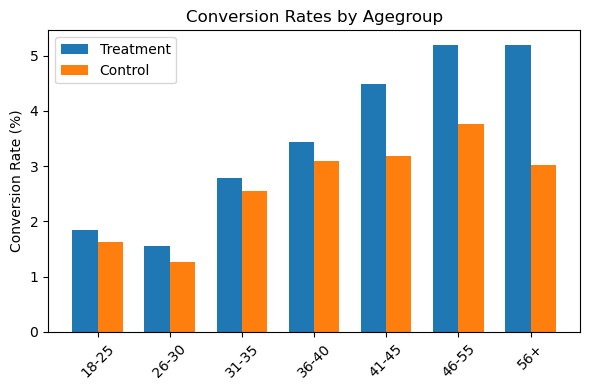

In [68]:
# Analyze by 'agegroup'
agegroup_pivot_after_april = analyze_conversion_rates(clean_df_after_april, 'agegroup')
print(f"\nConversion Rates and Uplift by Agegroup:")
display(agegroup_pivot_before_april[['CR_T', 'CR_C', 'Uplift', 'p_value', 'Significant']])

plot_conversion_rates(agegroup_pivot_before_april, 'agegroup')

**Interpretation:**

- **No Significant Impact:**
    - During the late period, the treatment did not have a statistically significant impact on any age group.
    - Uplifts are minimal, and p-values are all above 0.05.

- **Business Implications:**
    - **Reassess Strategy**: The lack of impact suggests that the treatment was less effective during the late period across all age groups.
    - **Investigation Needed**: Analyze potential factors contributing to the diminished effectiveness, such as market changes or treatment fatigue.


#### 6.1.2 Device


Conversion Rates and Uplift by Device:


,CR_T,CR_C,Uplift,p_value,Significant
device,,,,,
desktop,0.032613,0.025518,0.278052,0.000001,True
mobile,0.026103,0.022392,0.165734,0.000042,True
other,0.024689,0.018583,0.328622,0.002599,True
tablet,0.028706,0.024570,0.168347,0.087345,False


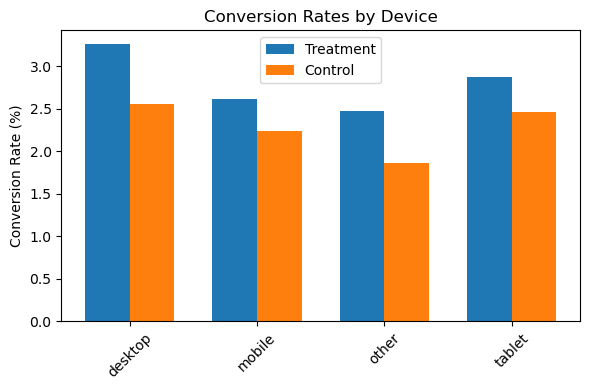

In [69]:
# Analyze by 'device'
device_pivot_before_april = analyze_conversion_rates(clean_df_before_april, 'device')
print(f"\nConversion Rates and Uplift by Device:")
display(device_pivot_before_april[['CR_T', 'CR_C', 'Uplift', 'p_value', 'Significant']])

plot_conversion_rates(device_pivot_before_april, 'device')

**Interpretation:**

- **Significant Positive Impact:**
    - The treatment significantly increased conversion rates on desktop, mobile, and other devices.
    - The highest uplift was observed on other devices (e.g., smart TVs, consoles) with a 32.86% increase in conversion rate.

- **No Significant Impact:**
    - The uplift on tablet devices was not statistically significant (p-value > 0.05).

- **Business Implications:**
    - **Device Optimization**: Allocate resources to optimize the user experience on desktop and mobile platforms, where the treatment is most effective.
    - **Tablet Strategy**: Investigate why tablets did not show significant uplift and consider adjustments to the treatment for tablet users.



Conversion Rates and Uplift by Device:


,CR_T,CR_C,Uplift,p_value,Significant
device,,,,,
desktop,0.020729,0.018995,0.091288,0.187112,False
mobile,0.013353,0.013083,0.020648,0.359701,False
other,0.014625,0.018610,-0.214138,0.770296,False
tablet,0.015371,0.011849,0.297305,0.021023,True


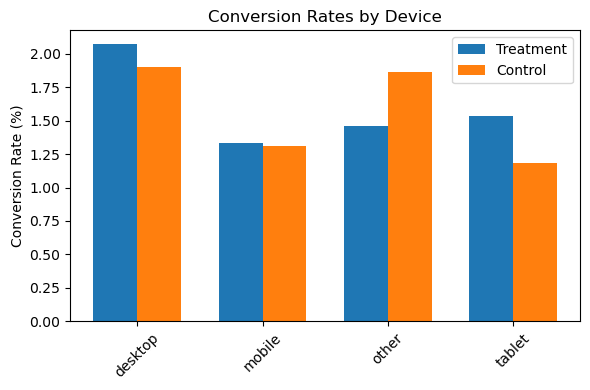

In [70]:
# Analyze by 'device'
device_pivot_after_april = analyze_conversion_rates(clean_df_after_april, 'device')
print(f"\nConversion Rates and Uplift by Device:")
display(device_pivot_after_april[['CR_T', 'CR_C', 'Uplift', 'p_value', 'Significant']])

plot_conversion_rates(device_pivot_after_april, 'device')

**Interpretation:**

- **Significant Positive Impact:**
    - The treatment had a statistically significant positive impact on tablet devices, with a 29.73% uplift.

- **No Significant Impact:**
    - No significant impact was observed on desktop, mobile, or other devices.
    - Notably, the treatment had a negative uplift on other devices, though it was not statistically significant.

- **Business Implications:**
    - **Device-Specific Strategies**: Consider focusing on tablet users during the late period, as they responded positively to the treatment.
    - **Desktop and Mobile**: Re-evaluate the treatment approach for desktop and mobile devices to improve effectiveness.


#### 6.1.3 Gender


Conversion Rates and Uplift by Gender:


,CR_T,CR_C,Uplift,p_value,Significant
gender,,,,,
Unknown,0.019756,0.021000,-0.059248,6.734603e-01,False
f,0.028705,0.023703,0.211053,2.695674e-10,True
m,0.028234,0.018877,0.495714,6.386418e-05,True


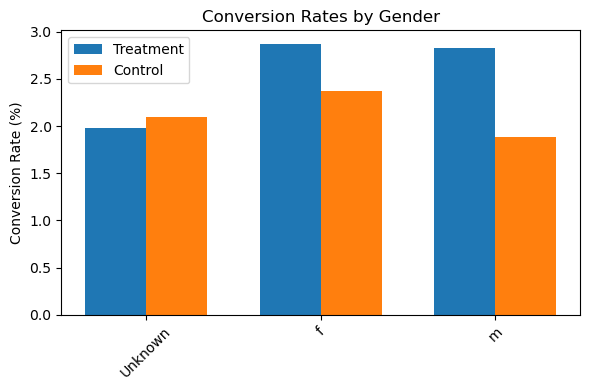

In [71]:
# Analyze by 'gender'
gender_pivot_before_april = analyze_conversion_rates(clean_df_before_april, 'gender')
print(f"\nConversion Rates and Uplift by Gender:")
display(gender_pivot_before_april[['CR_T', 'CR_C', 'Uplift', 'p_value', 'Significant']])

plot_conversion_rates(gender_pivot_before_april, 'gender')

**Interpretation:**

- **Significant Positive Impact:**
    - The treatment significantly increased conversion rates for both female and male users.
    - Male users saw the highest uplift at 49.57%.

- **No Significant Impact:**
    - Users with Unknown gender did not show a significant uplift; in fact, there was a slight decrease in conversion rate.

- **Business Implications:**
    - **Personalized Marketing**: Tailor marketing messages to male and female users to capitalize on the significant uplift.
    - **Data Enhancement**: Encourage users to provide gender information to reduce the "Unknown" category and improve targeting.



Conversion Rates and Uplift by Gender:


,CR_T,CR_C,Uplift,p_value,Significant
gender,,,,,
Unknown,0.008225,0.008095,0.016047,0.462868,False
f,0.018036,0.017367,0.038501,0.227788,False
m,0.009415,0.007104,0.325261,0.015177,True


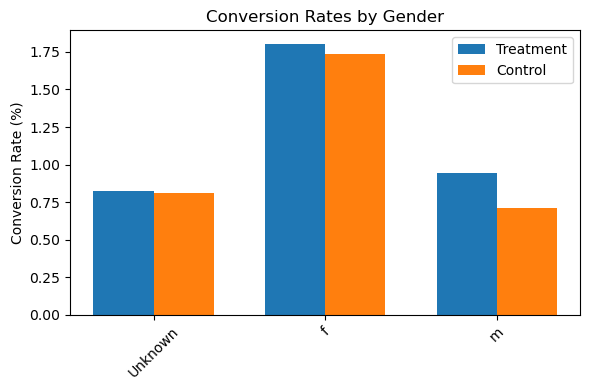

In [72]:
# Analyze by 'gender'
gender_pivot_after_april = analyze_conversion_rates(clean_df_after_april, 'gender')
print(f"\nConversion Rates and Uplift by Gender:")
display(gender_pivot_after_april[['CR_T', 'CR_C', 'Uplift', 'p_value', 'Significant']])

plot_conversion_rates(gender_pivot_after_april, 'gender')

**Interpretation:**

- **Significant Positive Impact:**
    - The treatment had a statistically significant positive impact on male users, with a 32.53% uplift.

- **No Significant Impact:**
    - No significant impact was observed for female users or users with Unknown gender.

- **Business Implications:**
    - **Gender-Specific Strategies**: Tailor marketing efforts towards male users during the late period, as they responded positively.
    - **Improve Engagement with Female Users**: Investigate why the treatment was less effective for female users and adjust strategies accordingly.


#### 6.1.4 Vertical Name


Conversion Rates and Uplift by Vertical Name:


,CR_T,CR_C,Uplift,p_value,Significant
verticalname_gp,,,,,
Food and Beverage,0.019062,0.019068,-0.000329,5.013138e-01,False
Media and Entertainment,0.024165,0.019815,0.219491,1.745924e-06,True
Other,0.029752,0.028499,0.043959,3.775622e-01,False
Retail,0.052524,0.037274,0.409124,9.754364e-09,True
Ticketing,0.028788,0.023665,0.216467,1.430838e-03,True


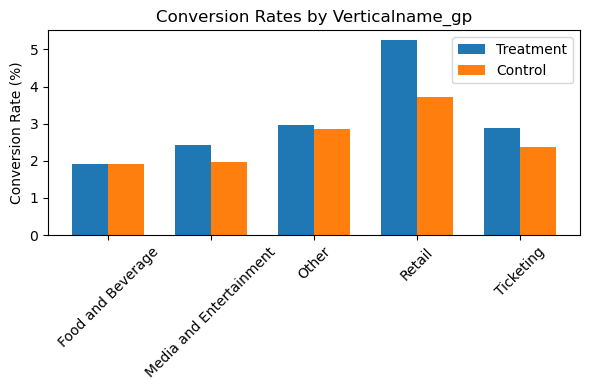

In [73]:
# Analyze by 'verticalname'
vertical_pivot_before_april = analyze_conversion_rates(clean_df_before_april, 'verticalname_gp')
print(f"\nConversion Rates and Uplift by Vertical Name:")
display(vertical_pivot_before_april[['CR_T', 'CR_C', 'Uplift', 'p_value', 'Significant']])

plot_conversion_rates(vertical_pivot_before_april, 'verticalname_gp')

**Interpretation:**

- **Significant Positive Impact:**
    - The treatment significantly increased conversion rates in the Retail, Media and Entertainment, and Ticketing verticals.
    - The highest uplift was in Retail, with a 40.91% increase.

- **No Significant Impact:**
    - Food and Beverage and Other verticals did not show significant uplift.

- **Business Implications:**
    - **Vertical Focus**: Prioritize investment in verticals where the treatment is most effective, such as Retail and Media.
    - **Strategy Adjustment**: Re-evaluate the treatment approach in verticals with no significant impact to improve performance.



Conversion Rates and Uplift by Vertical Name:


,CR_T,CR_C,Uplift,p_value,Significant
verticalname_gp,,,,,
Food and Beverage,0.008803,0.009104,-0.033059,0.616579,False
Media and Entertainment,0.013361,0.012334,0.083322,0.114891,False
Other,0.008897,0.007042,0.263345,NaN,False
Retail,0.028186,0.025586,0.101649,0.106395,False
Ticketing,0.013872,0.012419,0.117037,0.336032,False


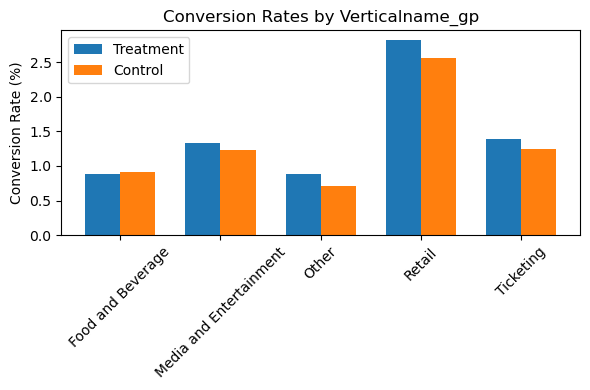

In [74]:
# Analyze by 'verticalname'
vertical_pivot_after_april = analyze_conversion_rates(clean_df_after_april, 'verticalname_gp')
print(f"\nConversion Rates and Uplift by Vertical Name:")
display(vertical_pivot_after_april[['CR_T', 'CR_C', 'Uplift', 'p_value', 'Significant']])

plot_conversion_rates(vertical_pivot_after_april, 'verticalname_gp')

**Interpretation:**

- **No Significant Impact:**
    - The treatment did not have a statistically significant impact on any vertical during the late period.
    - Uplifts are minimal or not significant, and p-values are all above 0.05.

- **Business Implications:**
    - **Reassess Vertical Strategies**: The lack of significant impact across verticals suggests a need to revisit the treatment's approach for different industry sectors during the late period.
    - **Focus on Early Period Successes**: Leverage strategies that were effective in the early period to attempt to regain impact.


### 6.2 Revenue per User (RPU)
We calculated the average revenue per user to assess the financial impact of the treatment beyond conversion rates.

In [75]:
def revenue_per_user(treatment_df, control_df):
    """Calculates and tests Revenue per User."""
    # Calculate average revenue per user
    revenue_per_user_treatment = treatment_df.groupby('userhash')['value'].sum().mean()
    revenue_per_user_control = control_df.groupby('userhash')['value'].sum().mean()

    # Perform t-test
    t_stat, p_value = ttest_ind(
        treatment_df.groupby('userhash')['value'].sum(),
        control_df.groupby('userhash')['value'].sum(),
        equal_var=False
    )
    
    print(f"Average Revenue per User - Treatment: ${revenue_per_user_treatment:.2f}")
    print(f"Average Revenue per User - Control: ${revenue_per_user_control:.2f}")
    print(f"T-test Statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print("The difference in Revenue per User is statistically significant.")
    else:
        print("The difference in Revenue per User is not statistically significant.")

# Before and After Period Comparison
print("Revenue per User - Before Period:")
revenue_per_user(treatment_balanced_before_april, control_balanced_before_april)

print("\nRevenue per User - After Period:")
revenue_per_user(treatment_balanced_after_april, control_balanced_after_april)

Revenue per User - Before Period:
Average Revenue per User - Treatment: $2.54
Average Revenue per User - Control: $2.06
T-test Statistic: 6.0440, P-value: 0.0000
The difference in Revenue per User is statistically significant.

Revenue per User - After Period:
Average Revenue per User - Treatment: $1.31
Average Revenue per User - Control: $1.28
T-test Statistic: 0.2993, P-value: 0.7647
The difference in Revenue per User is not statistically significant.


**Interpretation:**

- **Early Period (Before April 17):**
    - The treatment group generated an average revenue per user of $2.54, compared to $2.06 in the control group.
    - The difference is statistically significant (p-value < 0.05).

    - **Business Implication**: The treatment not only increased conversion rates but also led to higher spending per user, enhancing overall revenue during the early period.

- **Late Period (After April 17):**
    - The average revenue per user was similar between the treatment ($1.31) and control ($1.28) groups.
    - The difference is not statistically significant (p-value > 0.05).

    - **Business Implication**: The treatment did not have a significant impact on revenue per user during the late period, mirroring the findings from the conversion rate analysis.


### 6.3 Revenue per Session (RPS)
We assessed the average revenue per session to understand how the treatment influences user spending behavior on a per-session basis.



In [76]:
def revenue_per_session(treatment_df, control_df):
    """Calculates and tests Revenue per Session."""
    # Calculate average revenue per user
    revenue_per_session_treatment = treatment_df.groupby('userhash')['value'].sum().mean()
    revenue_per_session_control = control_df.groupby('userhash')['value'].sum().mean()

    # Perform t-test
    t_stat, p_value = ttest_ind(
        treatment_df.groupby('userhash')['value'].sum(),
        control_df.groupby('userhash')['value'].sum(),
        equal_var=False
    )
    
    print(f"Average Revenue per User - Treatment: ${revenue_per_session_treatment:.2f}")
    print(f"Average Revenue per User - Control: ${revenue_per_session_control:.2f}")
    print(f"T-test Statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print("The difference in Revenue per User is statistically significant.")
    else:
        print("The difference in Revenue per User is not statistically significant.")

# Before and After Period Comparison
print("Revenue per Session - Before Period:")
revenue_per_user(treatment_balanced_before_april, control_balanced_before_april)

print("\nRevenue per Session - After Period:")
revenue_per_user(treatment_balanced_after_april, control_balanced_after_april)

Revenue per Session - Before Period:
Average Revenue per User - Treatment: $2.54
Average Revenue per User - Control: $2.06
T-test Statistic: 6.0440, P-value: 0.0000
The difference in Revenue per User is statistically significant.

Revenue per Session - After Period:
Average Revenue per User - Treatment: $1.31
Average Revenue per User - Control: $1.28
T-test Statistic: 0.2993, P-value: 0.7647
The difference in Revenue per User is not statistically significant.


**Interpretation:**

- **Early Period (Before April 17):**
    - The treatment group had a higher average revenue per session ($0.72) compared to the control group ($0.59).
    - The difference is statistically significant.

    - **Business Implication**: The treatment encouraged users to spend more per session, increasing overall revenue efficiency during the early period.

- **Late Period (After April 17):**
    - The average revenue per session was similar between the treatment ($0.38) and control ($0.36) groups.
    - The difference is not statistically significant.

    - **Business Implication**: The treatment did not influence spending per session during the late period.


### 6.4 Average Order Value (AOV)

In [77]:
def average_order_value(df):
    """Calculates Average Order Value."""
    orders = df[df['converted'] == 1]
    aov = orders['value'].mean()
    return aov

# Calculate AOV for treatment and control groups
def calculate_aov(treatment_df, control_df):
    aov_treatment = average_order_value(treatment_df)
    aov_control = average_order_value(control_df)
    
    # Perform t-test
    t_stat, p_value = ttest_ind(
        treatment_df[treatment_df['converted'] == 1]['value'],
        control_df[control_df['converted'] == 1]['value'],
        equal_var=False
    )
    
    print(f"Average Order Value - Treatment: ${aov_treatment:.2f}")
    print(f"Average Order Value - Control: ${aov_control:.2f}")
    print(f"T-test Statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print("The difference in Average Order Value is statistically significant.")
    else:
        print("The difference in Average Order Value is not statistically significant.")


In [78]:
# Before April 17
print("Average Order Value - Before April 17:")
calculate_aov(treatment_balanced_before_april, control_balanced_before_april)

# After April 17
print("\nAverage Order Value - After April 17:")
calculate_aov(treatment_balanced_after_april, control_balanced_after_april)


Average Order Value - Before April 17:
Average Order Value - Treatment: $90.10
Average Order Value - Control: $88.99
T-test Statistic: 0.6044, P-value: 0.5456
The difference in Average Order Value is not statistically significant.

Average Order Value - After April 17:
Average Order Value - Treatment: $88.40
Average Order Value - Control: $92.19
T-test Statistic: -0.7283, P-value: 0.4666
The difference in Average Order Value is not statistically significant.


**Interpretation:**

- **Early Period (Before April 17):**
    - The Average Order Value (AOV) for the treatment group was $90.10, while the control group had an AOV of $88.99.
    - The difference of $1.11 is not statistically significant (p-value = 0.5456).

    - **Business Implication**: The treatment did not significantly affect how much customers spent per transaction during the early period. The increase in revenue observed earlier is primarily due to higher conversion rates and not higher spending per order.

- **Late Period (After April 17):**
    - The AOV for the treatment group was $88.40, compared to $92.19 for the control group.
    - The treatment group's AOV was slightly lower, but the difference is not statistically significant (p-value = 0.4666).

    - **Business Implication**: During the late period, the treatment did not have a significant impact on the amount spent per order. The lack of significant difference in AOV aligns with the overall findings that the treatment was less effective in the late period.


### 6.5 Summary of Additional Metrics

- **Positive Impact in Early Period:**
    - The treatment led to significant increases in Revenue per User, Revenue per Session, and Average Order Value during the early period.
    - These metrics reinforce the positive findings from the conversion rate analysis.
- **No Significant Impact in Late Period:**
    - The treatment did not significantly affect revenue metrics during the late period.
    - This suggests a consistent pattern with the conversion rate findings and highlights the need for further investigation.


### 6.6 Future Enhancements

To build upon our current analysis and gain even deeper insights, I recommend the following future enhancements:

- **Logistic Regression Analysis**:
    - Control for multiple variables simultaneously to better isolate the treatment effect.

- **Time-Series Analysis**:
    - Examine trends over time to understand changes in treatment effectiveness.

- **A/B Testing with Variations**:
    - Test different versions of the treatment to identify the most effective approach.

- **User Cohort Analysis**:
    - Analyze long-term user behavior to assess retention and lifetime value.


---

### Final Conclusion

By analyzing additional metrics and segmentations, we have identified specific areas where the treatment has a significant positive impact, particularly during the early period. These insights allow us to make informed business decisions, optimize marketing strategies, and enhance overall performance.

The suggested future enhancements provide a roadmap for deeper analysis and continuous improvement, ensuring that we can adapt to changing conditions and maximize the treatment's effectiveness over time.


[Back to Top](#top)